
<h1 style="text-align: center;">Analyse des ventes d'une librairie en ligne </h1>


<div style="text-align: center;">
    <img src="data/logo.jpg" alt="Mon logo" width="300"/>
</div>


# Rappel de la Mission

## I - Contexte
Lapage, une grande librairie en ligne issue d'une chaîne physique, souhaite faire le point sur ses ventes en ligne après deux ans d’activité. Cette analyse servira à orienter les décisions stratégiques sur les offres, les prix et la connaissance client.

## II- Objectif
Analyser les ventes en ligne de Lapage pour identifier des tendances, mieux comprendre les comportements clients et proposer des axes d’amélioration pour la stratégie commerciale et marketing.

## III - Méthodologie
1. **Collecte et préparation des données** : Importation et préparation des données de ventes et des informations clients.
2. **Étude du chiffre d'affaires** : Suivi de l'évolution du chiffre d'affaires dans le temps, analyse des produits les plus populaires (tops/flops) et répartition des ventes par catégorie.
3. **Analyse de la concentration des ventes** : Utilisation de la courbe de Lorenz pour évaluer la répartition du chiffre d'affaires entre différents profils clients.
4. **Analyse des comportements clients** : Étude des corrélations entre le genre, l'âge des clients, le montant total des achats, la fréquence d'achat et le panier moyen.

5. **Recommandations** : Formulation de recommandations stratégiques basées sur les résultats.

## VI - Points attendus
- **Identification des segments de clientèle** : Compréhension des comportements d’achat selon des indicateurs clés (âge, genre, panier moyen).
- **Analyse des produits** : Identification des produits les plus performants et des catégories de livres qui génèrent le plus de ventes.
- **Recommandations stratégiques** : Propositions pour cibler les segments clients les plus rentables et optimiser la stratégie commerciale de Lapage.


# Sommaire

A. **Importation des librairies**
B. **Collecte et Nettoyage des Données**
   - Importation des données clients et ventes
   - Préparation et préparation des données
   - Traitement des valeurs manquantes

C. **Étude du Chiffre d'Affaires**
   - Indicateurs et graphiques autour du CA
   - Suivi de l'évolution du chiffre d'affaires dans le temps
   - Analyse des produits les plus populaires (tops/flops)

D. **Analyse des Comportements Clients**
   - Profilage ( type de client, genre, âge, 
   - Étude des corrélations : âge, genre, montant total des achats, fréquence d'achat, panier moyen
   - Zoom sur les clients b to b 
   
E. **Analyse de la Concentration des Ventes**
   - Courbe de Lorenz : répartition du chiffre d'affaires entre différents profils clients  


F. **Conclusion**
   - Résumé des principaux insights
   - Recommandations basées sur les résultats d'analyse

# A- Import des librairies

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ks_2samp
import numpy as np
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import kstest

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score


# B- Collecte et préparation des Données
   

## I- Import  et des données clients et ventes


In [2]:
customers= pd.read_csv("file:data/customers.csv")

products= pd.read_csv("file:data/products.csv")

transactions= pd.read_csv("file:data/transactions.csv")


## II-Préparation et nettoyage des données
   

### Table 1- Clients

In [3]:
#Vérification des premières lignes 
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#Vérification des dernières lignes 
customers.tail()

,client_id,sex,birth
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968
8622,c_84,f,1982


In [5]:
# recherche d'information sur le nombre de valeurs null et le type des colonnes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
#recherche des valeurs manquantes
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
# structure du df
customers.shape

(8623, 3)

In [8]:
#recherche des doublons
customers.duplicated().sum()

0

In [9]:
#recherche des doublons sur la clé primaire "client_id"
customers.duplicated(subset=["client_id"]).sum()

0

In [10]:
#Calcul de l'âge de chaque client et creation de la colonne âge
import datetime
year = datetime.datetime.now().year 
customers['age'] = year - customers['birth'] 
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
 3   age        8623 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 269.6+ KB


### Table 2- Produits

In [11]:

#Vérification des premières lignes 
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
#Vérification des dernières lignes 
products.tail()

,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [13]:
# structure du df
products.shape

(3287, 3)

In [14]:
# recherche d'information sur le nombre de valeurs null et le type des colonnes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [15]:
#recherche des valeurs manquantes
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [16]:
#recherche des doublons
products.duplicated().sum()

0

In [17]:
#recherche des doublons sur la clé primaire "id_prod"
products.duplicated(subset=["id_prod"]).sum()

0

### Table 3- Ventes

In [18]:
#Vérification des premières lignes 
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [19]:
#Vérification des dernières lignes 
transactions.tail()

,id_prod,date,session_id,client_id
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227
679531,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873


In [20]:
# structure du df
transactions.shape

(679532, 4)

In [21]:
# recherche d'information sur le nombre de valeurs null et le type des colonnes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


La variable date n'a pas le bon type

In [22]:

#creation de la table df-test pour visualiser les données de test 
df_test=transactions[transactions.date.str.contains('test')]
df_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [23]:
#Supprésion des données de test dans la table transaction
transactions=transactions.drop(transactions[transactions.date.str.contains("test")].index)
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [24]:
# changement du type date  de object à datetime
transactions['date'] = pd.to_datetime(transactions['date'])


In [25]:
#Création des colonnes 'new_date' et 'time'
transactions['new_date'] = [d.date() for d in transactions['date']]
transactions["new_date"] = pd.to_datetime(transactions["new_date"])
transactions['time'] = [d.time()for d in transactions['date']]
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['year_month'] = transactions['date'].dt.to_period('M')


In [26]:

#Création de la colonne  nombre , j'assigne le chiffre 1 car chque ligne = vente d'un article
transactions['nombre'] = 1

In [27]:
# Vérification
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   new_date    679332 non-null  datetime64[ns]
 5   time        679332 non-null  object        
 6   year        679332 non-null  int64         
 7   month       679332 non-null  int64         
 8   year_month  679332 non-null  period[M]     
 9   nombre      679332 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4), period[M](1)
memory usage: 57.0+ MB


In [28]:
#recherche des valeurs manquantes
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
new_date      0
time          0
year          0
month         0
year_month    0
nombre        0
dtype: int64

In [29]:
#recherche des doublons sur la clé primaire ["id_prod","session_id","client_id","time"]
transactions.duplicated(subset=["id_prod","session_id","client_id","time"]).sum()

0

## III- Traitement des valeurs manquantes

**Fusion des données**

In [30]:
#fusion des df transactions et products
 
t_p = pd.merge(transactions,products,on=["id_prod"],how='left')
t_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   new_date    679332 non-null  datetime64[ns]
 5   time        679332 non-null  object        
 6   year        679332 non-null  int64         
 7   month       679332 non-null  int64         
 8   year_month  679332 non-null  period[M]     
 9   nombre      679332 non-null  int64         
 10  price       679111 non-null  float64       
 11  categ       679111 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(4), period[M](1)
memory usage: 67.4+ MB


**Nous avons des valeurs manquantes au niveau de price et categ**

In [31]:
#recherche des valeurs manquantes
t_p.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
new_date        0
time            0
year            0
month           0
year_month      0
nombre          0
price         221
categ         221
dtype: int64

In [32]:
t_p.isna().mean()

id_prod       0.000000
date          0.000000
session_id    0.000000
client_id     0.000000
new_date      0.000000
time          0.000000
year          0.000000
month         0.000000
year_month    0.000000
nombre        0.000000
price         0.000325
categ         0.000325
dtype: float64

In [33]:
#visualisation des valeurs manquantes
df1 = t_p[t_p.isnull().any(axis=1)]
print (df1)

       id_prod                       date session_id client_id   new_date  \
2633    0_2245 2022-09-23 07:22:38.636773   s_272266    c_4746 2022-09-23   
10103   0_2245 2022-07-23 09:24:14.133889   s_242482    c_6713 2022-07-23   
11723   0_2245 2022-12-03 03:26:35.696673   s_306338    c_5108 2022-12-03   
15670   0_2245 2021-08-16 11:33:25.481411    s_76493    c_1391 2021-08-16   
16372   0_2245 2022-07-16 05:53:01.627491   s_239078    c_7954 2022-07-16   
...        ...                        ...        ...       ...        ...   
669533  0_2245 2021-08-25 09:06:03.504061    s_80395     c_131 2021-08-25   
670484  0_2245 2022-03-06 19:59:19.462288   s_175311    c_4167 2022-03-06   
671088  0_2245 2022-05-16 11:35:20.319501   s_209381    c_4453 2022-05-16   
675480  0_2245 2022-02-11 09:05:43.952857   s_163405    c_1098 2022-02-11   
677797  0_2245 2021-12-14 22:34:54.589921   s_134446    c_4854 2021-12-14   

                   time  year  month year_month  nombre  price  categ  
263

In [34]:
#Recherche de la valeur de l'id_produit concerné
df1["id_prod"].unique()

array(['0_2245'], dtype=object)

In [35]:
df1

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,07:22:38.636773,2022,9,2022-09,1,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,09:24:14.133889,2022,7,2022-07,1,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,03:26:35.696673,2022,12,2022-12,1,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,11:33:25.481411,2021,8,2021-08,1,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,05:53:01.627491,2022,7,2022-07,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021-08-25,09:06:03.504061,2021,8,2021-08,1,NaN,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022-03-06,19:59:19.462288,2022,3,2022-03,1,NaN,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022-05-16,11:35:20.319501,2022,5,2022-05,1,NaN,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022-02-11,09:05:43.952857,2022,2,2022-02,1,NaN,NaN


In [36]:
#Recherche de l'id_produit "0_2245" dans la table product
p=products[products.id_prod=="0_2245"]

print("valeur inexistante")
p

valeur inexistante


,id_prod,price,categ


In [37]:
#fusion des df t_p et customers
dff = pd.merge(t_p,customers,on=["client_id"],how='left')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   new_date    679332 non-null  datetime64[ns]
 5   time        679332 non-null  object        
 6   year        679332 non-null  int64         
 7   month       679332 non-null  int64         
 8   year_month  679332 non-null  period[M]     
 9   nombre      679332 non-null  int64         
 10  price       679111 non-null  float64       
 11  categ       679111 non-null  float64       
 12  sex         679332 non-null  object        
 13  birth       679332 non-null  int64         
 14  age         679332 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(

In [38]:
#Recherche du prix moyen des articles de la catégorie 0
print('Catégorie 0 :',
      # Prix moyen
    '\n- Prix moyen :', round(dff[dff['categ']==0.]['price'].mean(), 2), 
      # Prix médian
    '\n- Prix médian :', dff[dff['categ']==0.]['price'].median()) 
     

Catégorie 0 : 
- Prix moyen : 10.64 
- Prix médian : 9.99


In [39]:
#Remplacement des valeurs manquantes par 0. qui est le préfixe de l'id produit
dff['categ'].replace(np.nan, 0., inplace=True)

In [40]:
#Remplacement des valeurs manquantes par le mooyenne
dff['price'].replace(np.nan,10.64, inplace=True)


In [41]:
#Vérification
p_nan= dff[dff['id_prod']=='0_2245']
p_nan.head(6)

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,07:22:38.636773,2022,9,2022-09,1,10.64,0.0,m,1940,84
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,09:24:14.133889,2022,7,2022-07,1,10.64,0.0,f,1963,61
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,03:26:35.696673,2022,12,2022-12,1,10.64,0.0,m,1978,46
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,11:33:25.481411,2021,8,2021-08,1,10.64,0.0,m,1991,33
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,05:53:01.627491,2022,7,2022-07,1,10.64,0.0,m,1973,51
17392,0_2245,2023-01-21 18:39:25.649231,s_330241,c_6268,2023-01-21,18:39:25.649231,2023,1,2023-01,1,10.64,0.0,m,1991,33


In [42]:
# Vérification des données manquantes
dff.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
new_date      0
time          0
year          0
month         0
year_month    0
nombre        0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

In [43]:
df1 = dff.set_index('new_date')
df1.head()

,id_prod,date,session_id,client_id,time,year,month,year_month,nombre,price,categ,sex,birth,age
new_date,,,,,,,,,,,,,,
2022-05-20,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,13:21:29.043970,2022,5,2022-05,1,4.18,0.0,f,1986,38
2022-02-02,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,07:55:19.149409,2022,2,2022-02,1,15.99,1.0,m,1988,36
2022-06-18,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,15:44:33.155329,2022,6,2022-06,1,7.99,0.0,f,1968,56
2021-06-24,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,04:19:29.835891,2021,6,2021-06,1,69.99,2.0,m,2000,24
2023-01-11,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,08:22:08.194479,2023,1,2023-01,1,4.99,0.0,m,1980,44


### Résumé de la Collecte et préparation des Données

**Nettoyage des Données**

- **Vérification des 5 premières et 5 dernières valeurs** : Contrôle de l’intégrité des données en début et fin de table.
- **Vérification des valeurs manquantes et nulles** : Identification et gestion des données manquantes pour assurer la qualité des analyses.
- **Vérification des doublons** : Recherche de doublons, notamment au niveau des clés primaires, pour garantir l'unicité des enregistrements.
- **Vérification des types de données** : Contrôle des types pour chaque colonne afin d'assurer la cohérence des données.

- **Modifications appliquées** :
   - *Tables `products` et `customers`* : Aucune modification nécessaire.
   - *Table `transaction`* : Suppression des dates de test, modification du type de date en `datetime` et création de nouvelles colonnes (année, mois, etc.) pour faciliter l’analyse temporelle.
   
**Traitement des Valeurs Manquantes**

- Lors de la fusion des tables `transactions` et `products`, **221 valeurs manquantes** ont été identifiées au niveau des **prix** et des **catégories**.
- Les valeurs manquantes concernaient le produit `'0_2245'`. Les actions suivantes ont été prises :
  - **Catégorie (Categ)** : Remplacée par `0.`, car tous les produits commençaient par la référence de leur catégorie.
  - **Prix (Price)** : Remplacé par le **prix moyen** des produits de la catégorie `0.`, soit **10,64 €**.



# C- Étude du Chiffre d'Affaires

## I- Indicateurs et graphiques autour du CA 


### 1- CA annuelle

In [44]:
#calcul du ca par an
ca_total=dff.groupby(["year"])["price"].sum().reset_index()
ca_total.rename(columns={"price":"ca_total"},inplace= True)
ca_total

,year,ca_total
0,2021,4771752.24
1,2022,6109958.61
2,2023,974369.27


<AxesSubplot:title={'center':'Evolution du CA par an'}, xlabel='year'>

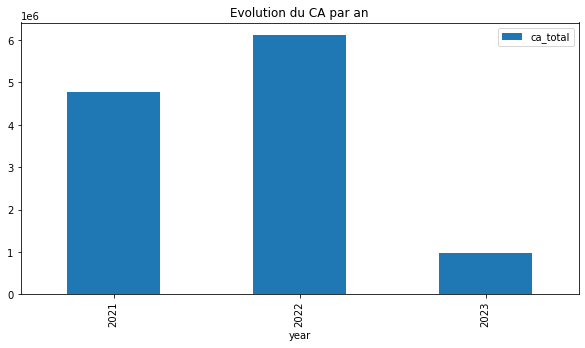

In [45]:
ca_total.plot(kind='bar', x="year",title='Evolution du CA par an',figsize=(10, 5), subplots=False)

**En 2021, les ventes ont été enregistrées sur 10 mois, année marquant également le lancement de la vente en ligne, ce qui peut expliquer le chiffre d'affaires relativement faible enregistré. Cependant, la tendance montre une évolution positive en 2022.**


### 2- CA mensuelle

In [46]:
# Création df ca représentant le ca total par année/ mois
ca1=pd.DataFrame(dff.groupby(["year","month"])["price"].sum())
ca1.rename(columns={"price":"ca_mois"},inplace= True)
ca=ca1.unstack(level=0)
ca

ca_mois                      
year        2021       2022       2023
month                                 
1            NaN  525392.19  517615.03
2            NaN  535688.54  456754.24
3      482536.37  515573.57        NaN
4      476258.26  493147.90        NaN
5      493028.59  517302.84        NaN
6      484163.04  496090.60        NaN
7      482877.96  510910.80        NaN
8      482380.55  506552.39        NaN
9      507368.36  494210.29        NaN
10     320873.22  508024.17        NaN
11     516274.13  496781.98        NaN
12     525991.76  510283.34        NaN

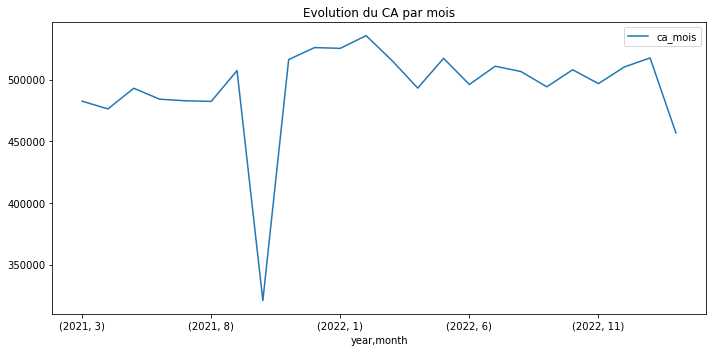

In [47]:
#Visulisation du CA par mois 
ca1.plot(kind='line',title='Evolution du CA par mois',figsize=(10, 5), subplots=False)

plt.tight_layout()

**On observe une baisse importante du CA en octobre 2021**

### Zoom sur le mois d'octobre 2021

In [48]:
#Isolation des VENTES du mois d'OCTOBRE 2021 via la table v_oct_2021
v_oct_2021=dff[(dff['new_date']>='2021-10-01') & (dff["new_date"]<='2021-10-31')]
v_oct_2021=v_oct_2021.sort_values(by="new_date", ascending=True)
v_oct_2021

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age
548769,0_1295,2021-10-01 09:13:31.927553,s_98334,c_6378,2021-10-01,09:13:31.927553,2021,10,2021-10,1,10.99,0.0,f,2004,20
527418,0_2154,2021-10-01 21:13:38.346215,s_98611,c_6813,2021-10-01,21:13:38.346215,2021,10,2021-10,1,8.15,0.0,f,1979,45
21551,1_480,2021-10-01 14:45:34.993152,s_98458,c_366,2021-10-01,14:45:34.993152,2021,10,2021-10,1,19.08,1.0,m,1978,46
567785,0_1324,2021-10-01 06:38:57.207165,s_98294,c_7267,2021-10-01,06:38:57.207165,2021,10,2021-10,1,3.93,0.0,m,1978,46
157507,0_1447,2021-10-01 07:53:06.972800,s_98320,c_6915,2021-10-01,07:53:06.972800,2021,10,2021-10,1,4.99,0.0,m,1998,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457623,0_1253,2021-10-31 08:27:58.069087,s_112651,c_4668,2021-10-31,08:27:58.069087,2021,10,2021-10,1,12.99,0.0,m,1958,66
458768,1_583,2021-10-31 01:53:45.428502,s_112509,c_4043,2021-10-31,01:53:45.428502,2021,10,2021-10,1,16.99,1.0,f,1985,39
459293,0_1745,2021-10-31 23:55:21.654841,s_112950,c_3320,2021-10-31,23:55:21.654841,2021,10,2021-10,1,4.99,0.0,m,1976,48
649048,1_374,2021-10-31 14:45:44.985480,s_112768,c_6919,2021-10-31,14:45:44.985480,2021,10,2021-10,1,10.71,1.0,f,1992,32


In [49]:
v_oct_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21606 entries, 548769 to 173218
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     21606 non-null  object        
 1   date        21606 non-null  datetime64[ns]
 2   session_id  21606 non-null  object        
 3   client_id   21606 non-null  object        
 4   new_date    21606 non-null  datetime64[ns]
 5   time        21606 non-null  object        
 6   year        21606 non-null  int64         
 7   month       21606 non-null  int64         
 8   year_month  21606 non-null  period[M]     
 9   nombre      21606 non-null  int64         
 10  price       21606 non-null  float64       
 11  categ       21606 non-null  float64       
 12  sex         21606 non-null  object        
 13  birth       21606 non-null  int64         
 14  age         21606 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(5), period[M]

**Les informations semblent complètes**

In [50]:
v_oct_2021.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
new_date      0
time          0
year          0
month         0
year_month    0
nombre        0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

**Aucune valeur manquante**

In [51]:
# Vérification des valeurs nulles
v_oct_2021_nan = v_oct_2021[v_oct_2021.isnull().any(axis=1)]
print (v_oct_2021_nan)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, new_date, time, year, month, year_month, nombre, price, categ, sex, birth, age]
Index: []


In [52]:
#Vérification des dates 
v_oct_2021["new_date"].unique()

array(['2021-10-01T00:00:00.000000000', '2021-10-02T00:00:00.000000000',
       '2021-10-03T00:00:00.000000000', '2021-10-04T00:00:00.000000000',
       '2021-10-05T00:00:00.000000000', '2021-10-06T00:00:00.000000000',
       '2021-10-07T00:00:00.000000000', '2021-10-08T00:00:00.000000000',
       '2021-10-09T00:00:00.000000000', '2021-10-10T00:00:00.000000000',
       '2021-10-11T00:00:00.000000000', '2021-10-12T00:00:00.000000000',
       '2021-10-13T00:00:00.000000000', '2021-10-14T00:00:00.000000000',
       '2021-10-15T00:00:00.000000000', '2021-10-16T00:00:00.000000000',
       '2021-10-17T00:00:00.000000000', '2021-10-18T00:00:00.000000000',
       '2021-10-19T00:00:00.000000000', '2021-10-20T00:00:00.000000000',
       '2021-10-21T00:00:00.000000000', '2021-10-22T00:00:00.000000000',
       '2021-10-23T00:00:00.000000000', '2021-10-24T00:00:00.000000000',
       '2021-10-25T00:00:00.000000000', '2021-10-26T00:00:00.000000000',
       '2021-10-27T00:00:00.000000000', '2021-10-28

**Toutes les dates sont bien repésentées**

In [53]:
#Vérification des catégories
v_oct_2021["categ"].unique()

array([0., 1., 2.])

**Toutes les troois catégories de produit sont bien repésentées**

In [54]:
#Vente journalière par catégorie
vjc=pd.DataFrame(v_oct_2021.groupby(["new_date","categ"])["price"].sum())
vjc.rename(columns={"price":"ca_jour"},inplace= True)
vjc_oct_2021=vjc.unstack(level=1)
print("Vente journalière du mois d'octobre par catégorie")
vjc_oct_2021

Vente journalière du mois d'octobre par catégorie


ca_jour                  
categ           0.0      1.0      2.0
new_date                             
2021-10-01  6950.50  7003.79  3104.05
2021-10-02  7141.01      NaN  2041.12
2021-10-03  6786.57      NaN  2206.48
2021-10-04  6554.88      NaN  2746.08
2021-10-05  6357.91      NaN  3032.55
2021-10-06  7546.58      NaN  1944.11
2021-10-07  6404.01      NaN  1787.07
2021-10-08  7069.53      NaN  3137.82
2021-10-09  6808.69      NaN  2616.67
2021-10-10  6490.98      NaN  2334.67
2021-10-11  7005.40      NaN  3225.16
2021-10-12  6706.97      NaN  2264.18
2021-10-13  6760.40      NaN  2666.82
2021-10-14  6422.39      NaN  3047.39
2021-10-15  6707.72      NaN  2701.75
2021-10-16  6898.14      NaN  3330.88
2021-10-17  6492.60      NaN  3065.38
2021-10-18  6376.43      NaN  2707.29
2021-10-19  5806.99      NaN  2816.00
2021-10-20  5913.41      NaN  3118.42
2021-10-21  6438.85      NaN  3132.94
2021-10-22  6051.86      NaN  2416.00
2021-10-23  5704.26      NaN  3206.38
2021-10-24  6036.65      NaN  3886.54
2021-10-25  5817.82      NaN  2258.22
2021-10-26  6345.65      NaN  2685.78
2021-10-27  5822.24      NaN  3967.29
2021-10-28  5837.61  6317.99  2602.82
2021-10-29  6410.57  6425.18  3617.88
2021-10-30  5734.62  6753.69  2898.47
2021-10-31  5924.07  7261.67  3219.38

Absence des transactions sur les produits de la catégorie 1.0 pendant la période du 02 au 27 Octobre 2021


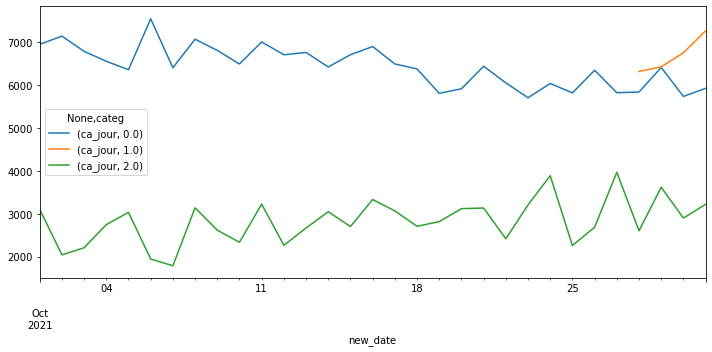

In [55]:
vjc_oct_2021.plot(kind='line',figsize=(10, 5), subplots=False)

plt.tight_layout()
print( "Absence des transactions sur les produits de la catégorie 1.0 pendant la période du 02 au 27 Octobre 2021")

**Des valeurs manquantes ont été observées pour les produits de la catégorie 1.0 entre le 2 et le 27 octobre 2021, ce qui pourrait probablement expliquer la baisse du chiffre d'affaires enregistré durant cette période.**

In [56]:
len(v_oct_2021)*100/len(dff)
print(" Le mois d'octobre représente",round(len(v_oct_2021)*100/len(dff),2), "%des données")

 Le mois d'octobre représente 3.18 %des données


**Les données du mois d'octobre 2021 représentent un volume de 3,18 % . L'absence de ces valeurs pourrait être due à un bug informatique, une rupture de stock, ou d'autres causes. N'ayant pas suffisamment d'indications pour imputer les valeurs manquantes de manière précise, la décision a été prise de supprimer l'ensemble des données de cette période afin de ne pas biaiser les résultats de l'analyse.**

In [57]:
#Suppression des valeurs de la période et Création df représentant, les données sans ceux de la période

df= dff.drop(v_oct_2021.index).copy()
df

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,13:21:29.043970,2022,5,2022-05,1,4.18,0.0,f,1986,38
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,07:55:19.149409,2022,2,2022-02,1,15.99,1.0,m,1988,36
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,15:44:33.155329,2022,6,2022-06,1,7.99,0.0,f,1968,56
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,04:19:29.835891,2021,6,2021-06,1,69.99,2.0,m,2000,24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,08:22:08.194479,2023,1,2023-01,1,4.99,0.0,m,1980,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,13:05:06.246925,2022,1,2022-01,1,12.99,0.0,f,1951,73
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,16:03:23.429229,2022,3,2022-03,1,10.99,1.0,f,1977,47
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,04:33:37.584749,2022,12,2022-12,1,12.99,0.0,f,1988,36
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,20:36:35.350579,2021,7,2021-07,1,4.98,0.0,m,1986,38


In [58]:
# Création df ca représentant le ca total par année/ mois
ca_new=pd.DataFrame(df.groupby(["year","month"])["price"].sum())
ca_new.rename(columns={"price":"ca_mois"},inplace= True)
ca_mensuel=ca_new.unstack(level=0)
ca_mensuel

ca_mois                      
year        2021       2022       2023
month                                 
1            NaN  525392.19  517615.03
2            NaN  535688.54  456754.24
3      482536.37  515573.57        NaN
4      476258.26  493147.90        NaN
5      493028.59  517302.84        NaN
6      484163.04  496090.60        NaN
7      482877.96  510910.80        NaN
8      482380.55  506552.39        NaN
9      507368.36  494210.29        NaN
10           NaN  508024.17        NaN
11     516274.13  496781.98        NaN
12     525991.76  510283.34        NaN

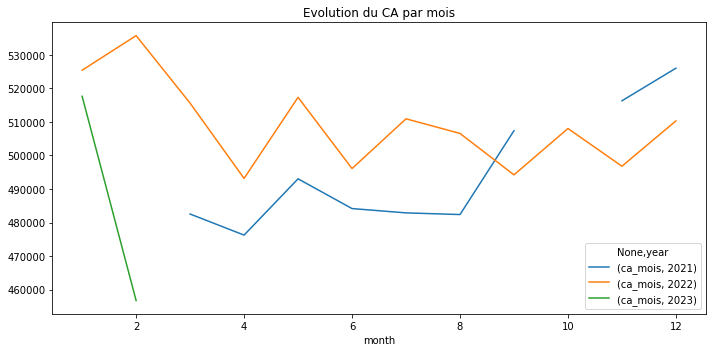

In [59]:
#Visulisation du CA par mois 
ca_mensuel.plot(kind='line',title='Evolution du CA par mois',figsize=(10, 5), subplots=False)

plt.tight_layout()

On note :
- **Des périodes de performance** : Principalement en janvier (2022), juillet (2022), et décembre (2021 et 2022).
- **Des périodes de stabilisation** : De mars à mai (2021), de juin à août (2021), et de mars à avril (2022).

Ces périodes montrent des moments clés où l’entreprise parvient soit à maximiser ses ventes (périodes de performance), soit à maintenir un rythme stable (périodes de stabilisation).


### 3 - Répartition des ventes par catégorie

### 3-a- Répartition des produits par catégorie ( prix et volume)

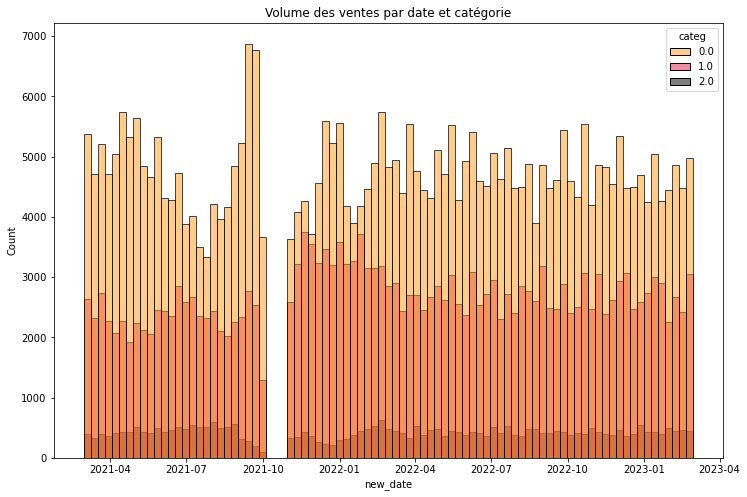

In [60]:
#volume des ventes par date et catégorie
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='new_date', hue='categ', palette=["#FF9A16", "#E7174A","#000000"])
plt.title('Volume des ventes par date et catégorie')

plt.show()

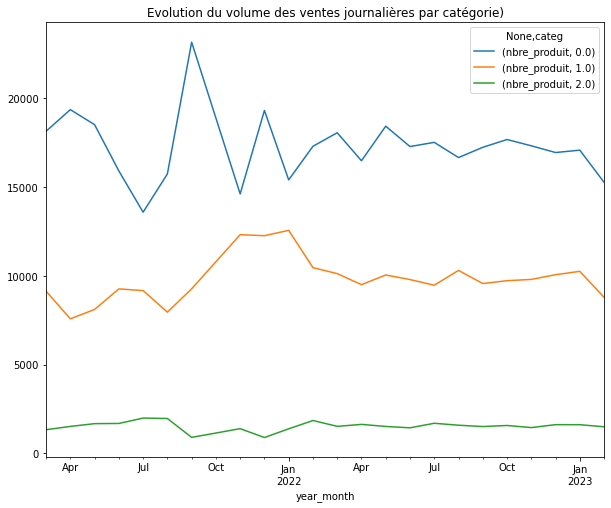

In [61]:
# Création df ca_p_volume représentant le volume journalier par catégorie 
# ainsi que le nombre d'articles vendus

ca_p_volume= pd.DataFrame(df.groupby(["year_month","categ"])["id_prod"].count())
ca_p_volume.rename(columns={"id_prod":"nbre_produit"},inplace= True)
ca_p_volume=ca_p_volume.unstack(level=1)

#Graphique
ca_p_volume.plot(kind='line',title='Evolution du volume des ventes journalières par catégorie)', figsize=(10,8),subplots=False)

plt.show()


### 3-b-  Evolution et saisonnalité du CA/ volume de vente par catégorie de produit 


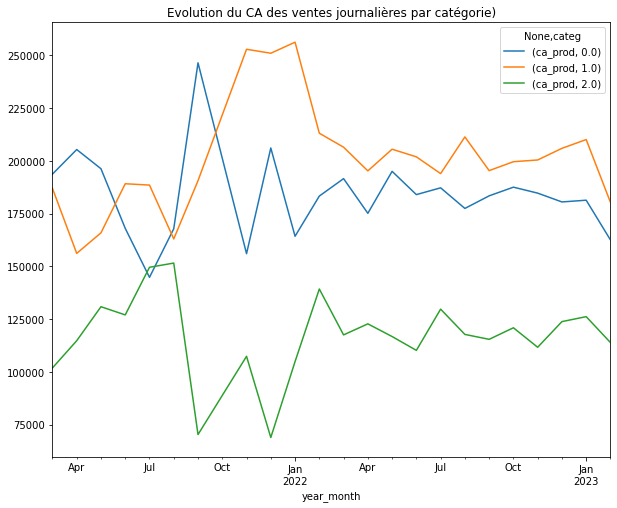

In [62]:
# Création df ca_p_categorie représentant le ca journalier par catégorie 
# ainsi que le nombre d'articles vendus

ca_p_categorie= pd.DataFrame(df.groupby(["year_month","categ"])["price"].sum())
ca_p_categorie.rename(columns={"price":"ca_prod"},inplace= True)
ca_p_categorie=ca_p_categorie.unstack(level=1)

#Graphique
ca_p_categorie.plot(kind='line',title='Evolution du CA des ventes journalières par catégorie)', figsize=(10,8),subplots=False)

plt.show()


En dehors d'une période de fluctuation entre Septembre 2021 et Février 2022, les ventes sont linéaires pour chacune des catégories. Il n'y a pas une réelle saisonnalité

**Zoom sur la période de septembre 2021 et Mars 2022**

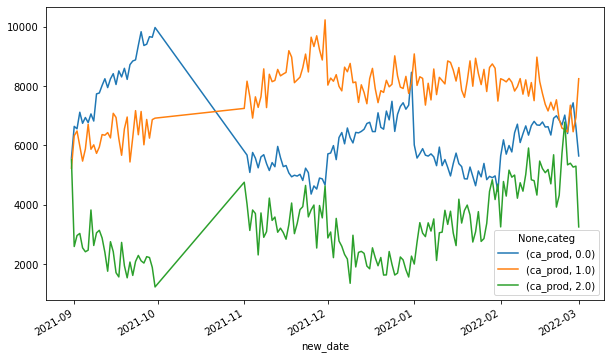

In [63]:
# Zoom sur la période de septembre 2021 et Mars 2022
# Isolation des datas de la période
df2=df[(df['new_date']>='2021-08-31') & (df["new_date"]<='2022-03-01')]

# Création df ca_p représentant le ca total par produit /année/ mois et le nombre d'article vendu par référence
ca_p_periode= pd.DataFrame(df2.groupby(["new_date","categ"])["price"].sum())
ca_p_periode.rename(columns={"price":"ca_prod"},inplace= True)

ca_p_periode=ca_p_periode.unstack(level=1)
ca_p_periode.plot(kind='line', figsize=(10,6),subplots=False)

plt.show()

Sur la période, le CA des catégories 1 et 0 a une tendance haussière ( d'ailleurs, ils atteignent leurs pics haut à cette période) tandis qu'on observe une baisse de ceux de la catégorie 0. Ils ateignent d'ailleur leur pic bas.

Un évènement marquant (confinement dû au Covid19, solde, salon, foire, ...) peut permettre de justifier cela mais, nous n'avons pas d'éléments à ce sujet.

### 3-c- CA par catégorie de produit

In [64]:
#Ca par catégorie de produit et volume de vente

ca_categ=df.groupby(["categ"])["price","nombre"].sum().reset_index()
ca_categ.rename(columns={"price":"ca_produit", "nombre":"nbre_article"},inplace= True)

ca_categ.head()

C:\Users\33618\AppData\Local\Temp\ipykernel_12184\3203840811.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ca_categ=df.groupby(["categ"])["price","nombre"].sum().reset_index()


,categ,ca_produit,nbre_article
0,0.0,4222757.10,396911
1,1.0,4619960.37,225503
2,2.0,2692489.43,35312


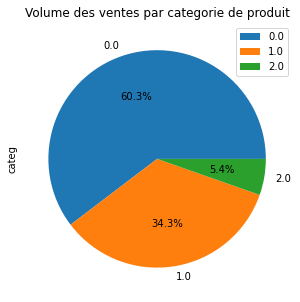

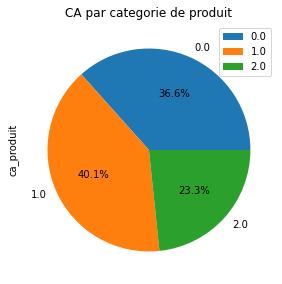

In [65]:
# Proportion des ventes  par categorie de produit
plt.figure(figsize=(7,5))
df['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Volume des ventes par categorie de produit')

# Proportion CA  par categorie de produit

plt.figure(figsize=(10,6))
ax2 = plt.subplot(121, aspect='equal')
ca_categ.plot(kind='pie',
               y = 'ca_produit',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=ca_categ["categ"],
               legend = True)
plt.title('CA par categorie de produit')

plt.show()

les articles de la catégorie 2 représentent 5,4% de volume de vente.Ce qui équivaut 1/4 du CA global sur la période. 
Cela peut s'expliquer par le prix des articles très élévé par rapport à celui des autres catégories.

Les articles de la catégorie 0 quant à eux sont ceux les plus vendus mais ne represéntent que 37% du CA  ( la gamme est très large et les prix sont bas)
Enfin , les ventes des produits la catégorie 1 sont relativement proportionnelles au CA réalisé

**Distribution et moyenne des prix par catégorie**

Distribution et moyenne des prix par catégorie


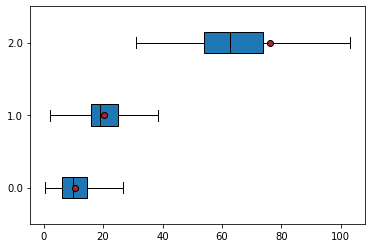

In [66]:
# Distribution et moyenne des prix par catégorie
X = "categ" # qualitative
Y = "price" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
print("Distribution et moyenne des prix par catégorie")
plt.show()

La distribution du prix de vente des produits de la **catégorie 2** présente une grande disparité : la moyenne est très supérieure à la médiane, indiquant la présence de produits dont le prix de vente est très élevé par rapport aux autres, sans pour autant être des outliers. 

La distribution des produits de la **catégorie 1** est **positivement asymétrique**, tandis que celle des produits de la **catégorie 0** est **approximativement symétrique** (c'est la distribution la plus concentrée).


**Nombre de produit par categorie**

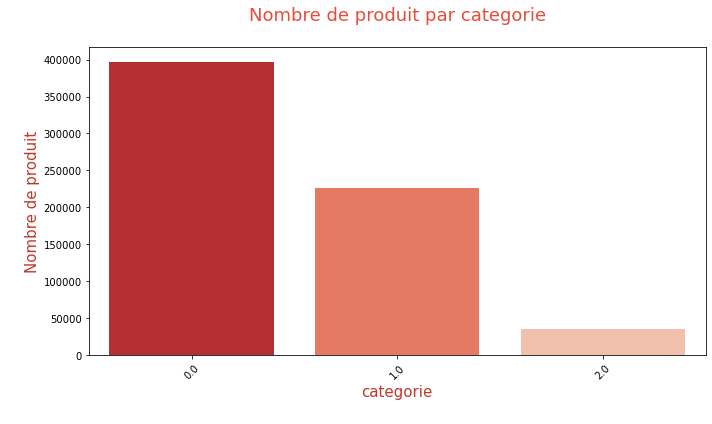

In [67]:
#"Nombre de produit par categorie
p_categ=df.groupby(["categ"])["id_prod"].count().reset_index()
p_categ.rename(columns={"id_prod":"nbre_article"},inplace= True)
p_categ

plt.figure(figsize=(10,6))
sns.barplot(y=p_categ['nbre_article'], x=p_categ['categ'], palette="Reds_r")
plt.ylabel('\nNombre de produit', fontsize=15, color='#c0392b')
plt.xlabel("categorie\n", fontsize=15, color='#c0392b')
plt.title("Nombre de produit par categorie\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

Les produits de la catégorie 2 se distingent par leur gamme très courte et leur prix élévés par rapport aux deux autres catégories

## II- Suivi de l'évolution du chiffre d'affaires dans le temps (Moyenne mobile)

Text(0.5, 1.0, 'Moyenne mobile')

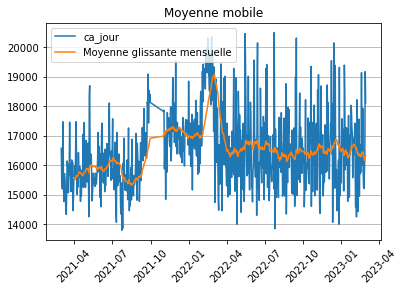

In [68]:
# Evolution dans le temps et mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale


#CALCUL DU ca journalier (ca_j)

ca_j=pd.DataFrame(df.groupby(["new_date"])["price"].sum())
ca_j.rename(columns={"price":"ca_jour"},inplace= True)
ca_j

ca_j.loc[:,'Moyenne glissante mensuelle'] = ca_j['ca_jour'].rolling(window=30).mean()

plt.plot(ca_j)

plt.xticks(rotation=45,fontsize=10)

plt.legend(ca_j.columns)

plt.figsize=(10, 5)

plt.grid(axis='y')

plt.title('Moyenne mobile')



les ventes présentent une forte varaiblité reflétant les fluctuations dues à divers facteurs comme la saisonnalité, les promotions, ou la demande journalière du marché., entre septembre 2021 et Mars 2022 On note une tendance haussière  . Pour le reste, la serie est stable et suit son évolution. Cela indique que le chiffre d'affaires journalier est revenu à un niveau plus constant après la volatilité observée pendant la période de pic.
Une analyse plus approfondie pourrait inclure l'examen des facteurs externes qui coïncident avec les pics ou les périodes de stabilisation identifiés afin de mieux comprendre les moteurs des fluctuations de chiffre d'affaires.

### III- Analyse des produits les plus populaires (tops/flops)


#### 1- Tops 

In [69]:
caj=pd.DataFrame(df.groupby(["categ","id_prod","price"])["price","nombre"].sum())
caj.rename(columns={"price":"ca_produit", "nombre":"nbre_article"},inplace= True)
caj_flop=caj.sort_values(by="nbre_article", ascending=True)
print("Flops des références")
caj_flop.head(25)

C:\Users\33618\AppData\Local\Temp\ipykernel_12184\1947011054.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  caj=pd.DataFrame(df.groupby(["categ","id_prod","price"])["price","nombre"].sum())


Flops des références


ca_produit  nbre_article
categ id_prod price                           
0.0   0_980   31.06        31.06             1
2.0   2_23    115.99      115.99             1
0.0   0_1533  27.99        27.99             1
      0_1284  1.38          1.38             1
      0_886   21.82        21.82             1
2.0   2_81    86.99        86.99             1
0.0   0_549   2.99          2.99             1
      0_541   1.99          1.99             1
      0_1601  1.99          1.99             1
      0_1683  2.99          2.99             1
      0_1595  2.99          2.99             1
      0_1633  24.99        24.99             1
      0_898   1.27          1.27             1
      0_1728  2.27          2.27             1
      0_1151  2.99          2.99             1
      0_1539  0.99          0.99             1
      0_833   2.99          2.99             1
2.0   2_98    149.74      149.74             1
0.0   0_1498  2.48          2.48             1
      0_807   1.99          1.99             1
      0_495   2.99          5.98             2
      0_1576  2.29          4.58             2
      0_521   23.99        47.98             2
1.0   1_514   67.66       135.32             2
0.0   0_453   29.99        59.98             2

#### 2- Flops

In [70]:
caj_top=caj.sort_values(by="nbre_article", ascending=False)

print("Tops des références")
caj_top.head(30)


Tops des références


ca_produit  nbre_article
categ id_prod price                          
1.0   1_369   23.99    53665.63          2237
      1_417   20.99    45611.27          2173
      1_414   23.83    51615.78          2166
      1_498   23.37    49474.29          2117
      1_425   16.99    35407.16          2084
      1_403   17.99    35080.50          1950
      1_412   16.65    32267.70          1938
      1_413   17.99    34738.69          1931
      1_406   24.81    47908.11          1931
      1_407   15.99    30748.77          1923
      1_398   10.17    19333.17          1901
      1_396   18.60    35340.00          1900
      1_395   28.99    53950.39          1861
      1_400   16.60    30344.80          1828
      1_392   18.11    32797.21          1811
      1_376   17.49    31324.59          1791
      1_385   25.99    46496.11          1789
      1_397   18.99    33859.17          1783
      1_388   16.70    29726.00          1780
      1_381   15.99    28254.33          1767
      1_389   24.99    44132.34          1766
      1_383   28.99    51080.38          1762
      1_378   26.61    45875.64          1724
      1_379   26.99    45829.02          1698
      1_431   27.99    46323.45          1655
      1_374   10.71    17617.95          1645
      1_426   19.44    31881.60          1640
      1_366   28.54    46691.44          1636
      1_493   10.99    17408.16          1584
      1_367   13.99    21908.34          1566

Les 20 produits les moins vendus sont ceux de la catégorie 2 et 0.

Les 20 produits les plus vendus sont ceux de la catégorie 1

N'ayant pas d'information sur les ventes( date de mise en vente) nous ne pouvons émettre une récommandation


## Synthèse du CA 

Le **CA** de l'année **2021** est relativement bas, car il s'agit de l'année de mise en ligne et les ventes ont été effectuées sur **10 mois**. Cependant, une tendance **positive** et **croissante** est observée en **2022**, montrant l’adaptation et l’expansion du marché.

L'analyse du **CA mensuel** montre une **chute significative** en **octobre 2021** en raison de l'absence de transactions sur les produits de la **catégorie 1** sur la période du **2 au 27 octobre 2021**. Cette absence peut être due à un **bug informatique** ou à une **rupture de stock**. En l'absence de données suffisantes pour estimer ces valeurs, il a été décidé de **supprimer** les données d'octobre afin de ne pas biaiser les résultats.

On note donc :

- **Des périodes de performance** : Les mois de **janvier 2022**, **juillet 2022**, ainsi que **décembre 2021/2022** se démarquent comme des périodes de **forte performance** où le CA atteint des niveaux élevés.
- **Des périodes de stabilisation** : Les périodes de **mars à mai 2021**, **juin à août 2021**, et **mars à avril 2022** montrent une stabilisation du CA, où il se maintient à un niveau cohérent, assurant une continuité des ventes.

### Concernant les produits :

### Catégorie 2 : Produits Premium à Forte Valeur Ajoutée, Flop 20 des ventes

- Gamme restreinte de produits avec des **prix élevés**, contribuant à **25 %** du chiffre d’affaires global malgré un **volume de vente relativement faible** (5,4 %).
- La moyenne des prix est significativement **supérieure à la médiane**, suggérant la présence de quelques **produits très coûteux** qui, bien que non considérés comme des valeurs aberrantes, influencent fortement la moyenne.

#### Évolution des Ventes :
- Une **baisse du chiffre d’affaires** est observée entre **septembre 2021 et février 2022**, ce qui pourrait indiquer une saisonnalité ou des fluctuations de la demande spécifiques à ces produits.
- Cette baisse pourrait également être liée à la nature des produits (articles de **luxe** ou à **haute valeur ajoutée**), sensibles aux variations saisonnières ou à des événements spécifiques (par exemple, baisse de la demande en dehors des périodes de fête ou d’offres promotionnelles).
- En dehors de la période mentionnée, les ventes se **stabilisent**, suggérant que ces produits conservent une **demande de base constante** malgré leur positionnement haut de gamme.

### Catégorie 1 : Produits à Prix Moyen et Volume Élevé, top 20 des ventes

- Gamme de produits à **prix moyen** avec une distribution **positivement asymétrique** : la majorité des produits se situe dans la gamme de prix **inférieure ou moyenne**.
- Quelques produits ont des prix significativement plus élevés que la médiane, mais ils ne sont pas assez nombreux pour influencer fortement la moyenne, contrairement à la **catégorie 2**.

#### Corrélation entre Volume de Vente et Chiffre d’Affaires :
- Les ventes de cette catégorie sont **proportionnelles** au chiffre d’affaires généré, montrant une **corrélation directe** entre le volume de produits vendus et leur contribution au chiffre d’affaires.

#### Évolution des Ventes :
- Forte **croissance du volume de ventes** entre **septembre 2021 et février 2022**, atteignant un pic. Cette période pourrait correspondre à une **demande accrue** ou à des **promotions** ayant stimulé les ventes.
- En dehors de cette période, les ventes se **stabilisent**, suggérant une **demande de base constante**, reflet de la fidélité des consommateurs ou d’un besoin récurrent pour ces produits.

### Catégorie 0 : Produits Accessibles à Fort Volume, Flop 20 des ventes

- Gamme étendue de produits à **prix bas**, avec une distribution des prix concentrée autour de la **médiane**, faisant de cette catégorie la plus **homogène** en termes de répartition des prix.

#### Contribution au Chiffre d’Affaires :
- Bien que cette catégorie représente le plus **haut volume de ventes** (60 %), elle ne contribue qu’à **37 %** du chiffre d’affaires global en raison de ses produits à faible prix.
- Cela montre que, bien que cette catégorie soit un pilier en termes de volume, elle n’a pas le même **impact financier** que les autres catégories.

#### Évolution des Ventes :
- Entre **septembre 2021 et février 2022**, la catégorie 0 connaît une **tendance haussière**, atteignant un pic de ventes similaire à celui de la catégorie 1.
- En dehors de ces périodes de pic, les ventes restent **stables**, indiquant une demande **régulière** et une constance dans les comportements d’achat des consommateurs.

---

L’analyse met en évidence des dynamiques de vente et des contributions au chiffre d'affaires qui varient selon les catégories de produits. Les prix jouent un rôle crucial, notamment pour la **catégorie 2**, qui, bien que peu vendue en volume, génère une part importante du CA. Les **catégories 0** et **1**, en revanche, montrent une influence plus proportionnelle au volume de vente. Pour une analyse plus fine, il serait pertinent d’examiner les facteurs externes qui coïncident avec les pics ou les périodes de stabilisation afin de mieux comprendre les moteurs des fluctuations du chiffre d'affaires.

En l’absence d’information sur les dates de mise en vente de ces produits, il est difficile d’émettre une analyse précise sur les tops et les flops des références vendues.


# D- Analyse des Comportements Clients

## I- Profilage

### 1- Profil par type de client

Proportion et répartition du CA


In [71]:
#création de la colonne classe d'âge
df['classe_age'] = pd.cut(x=df['age'], bins=[18,30,40,50,60,70,80,120])
df

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,13:21:29.043970,2022,5,2022-05,1,4.18,0.0,f,1986,38,"(30, 40]"
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,07:55:19.149409,2022,2,2022-02,1,15.99,1.0,m,1988,36,"(30, 40]"
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,15:44:33.155329,2022,6,2022-06,1,7.99,0.0,f,1968,56,"(50, 60]"
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,04:19:29.835891,2021,6,2021-06,1,69.99,2.0,m,2000,24,"(18, 30]"
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,08:22:08.194479,2023,1,2023-01,1,4.99,0.0,m,1980,44,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,13:05:06.246925,2022,1,2022-01,1,12.99,0.0,f,1951,73,"(70, 80]"
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,16:03:23.429229,2022,3,2022-03,1,10.99,1.0,f,1977,47,"(40, 50]"
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,04:33:37.584749,2022,12,2022-12,1,12.99,0.0,f,1988,36,"(30, 40]"
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,20:36:35.350579,2021,7,2021-07,1,4.98,0.0,m,1986,38,"(30, 40]"


**Nombre de sessions( de transactions) par client**

In [72]:
# création de la table ca_cl1 qui représente nombre de session/ client
ca_cl1= df.groupby(["client_id","sex","age"])["session_id"].count()

ca_cl1 = ca_cl1.reset_index()
ca_cl1=ca_cl1.sort_values(by="session_id", ascending=False)
ca_cl1.rename(columns={"session_id":"Nombre de transaction"},inplace= True)
print("nombre de session/ client")
ca_cl1.head(20)

nombre de session/ client


,client_id,sex,age,Nombre de transaction
677,c_1609,m,44,24472
6336,c_6714,f,56,8903
2723,c_3454,m,55,6635
4387,c_4958,m,25,5090
2513,c_3263,f,39,392
1772,c_2595,m,50,384
1268,c_2140,f,47,381
1197,c_2077,f,40,370
7119,c_7421,m,46,368
7790,c_8026,m,46,368


Les 4 premiers clients ont un nombre de transactions très élevé par rapport au reste des clients.

In [73]:
# Zoom sur ses clients
liste_client=["c_1609","c_6714","c_3454","c_4958"]
df_liste_client=df.loc[df["client_id"].isin(liste_client),:]
df_liste_client

,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age,classe_age
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,15:44:33.155329,2022,6,2022-06,1,7.99,0.0,f,1968,56,"(50, 60]"
17,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,2022-09-13,10:18:02.746197,2022,9,2022-09,1,22.99,1.0,f,1968,56,"(50, 60]"
32,1_426,2021-06-21 17:47:57.023863,s_51846,c_4958,2021-06-21,17:47:57.023863,2021,6,2021-06,1,19.44,1.0,m,1999,25,"(18, 30]"
63,1_506,2021-09-29 03:52:29.731798,s_97203,c_4958,2021-09-29,03:52:29.731798,2021,9,2021-09,1,13.65,1.0,m,1999,25,"(18, 30]"
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609,2022-10-05,07:43:00.225116,2022,10,2022-10,1,8.09,0.0,m,1980,44,"(40, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679195,0_1441,2021-08-31 11:25:29.198346,s_83113,c_1609,2021-08-31,11:25:29.198346,2021,8,2021-08,1,18.99,0.0,m,1980,44,"(40, 50]"
679229,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609,2021-04-02,13:23:57.034357,2021,4,2021-04,1,8.99,0.0,m,1980,44,"(40, 50]"
679253,2_185,2021-03-08 01:39:03.755607,s_3255,c_4958,2021-03-08,01:39:03.755607,2021,3,2021-03,1,43.99,2.0,m,1999,25,"(18, 30]"
679302,0_1442,2022-07-24 00:48:15.130619,s_242786,c_6714,2022-07-24,00:48:15.130619,2022,7,2022-07,1,4.89,0.0,f,1968,56,"(50, 60]"


In [74]:
# nombre de fois qu'une reférence est achetée lors d'une même session

ref_session=df_liste_client.groupby(["new_date","session_id","id_prod"])["nombre"].sum()\
.reset_index().sort_values(by="nombre", ascending=False)
print("Nombre de fois qu'une reférence est achetée lors d'une même session")
ref_session["nombre"].unique()


Nombre de fois qu'une reférence est achetée lors d'une même session


array([2, 1], dtype=int64)

In [75]:
#Nombre de produit acheté lors d'une session

prod_session =df_liste_client.groupby(["new_date","session_id"])["id_prod"].count().reset_index().sort_values(by="new_date", ascending=False)
print("Nombre de produit acheté lors d'une session")
prod_session["id_prod"].unique()

Nombre de produit acheté lors d'une session


array([ 1,  3,  2,  4,  7,  6,  5,  8, 10,  9, 11], dtype=int64)

**Les clients achètent au maximum 2 articles identiques par session**. Ils peuvent acheter jusqu'à 11 produits par session. La récurrence des achats ne semble pas être un bug ; il s'agit probablement de professionnels (revendeurs, responsables d'achat d'un organisme, etc.).



In [76]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
liste_client=["c_1609","c_6714","c_3454","c_4958"]
df['client_type'] = 'b_to_c'
df['client_type'].loc[df['client_id'].isin(liste_client)]='b_to_b'


# Création de 2 datasets
df_b2b = df[df['client_type']=='b_to_b']
df_b2c = df[df['client_type']=='b_to_c']

df.sample(3)

C:\Users\33618\AppData\Local\Temp\ipykernel_12184\3947458767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_type'].loc[df['client_id'].isin(liste_client)]='b_to_b'


,id_prod,date,session_id,client_id,new_date,time,year,month,year_month,nombre,price,categ,sex,birth,age,classe_age,client_type
651091,0_2243,2021-11-15 11:13:22.057080,s_119958,c_2644,2021-11-15,11:13:22.057080,2021,11,2021-11,1,8.99,0.0,f,1975,49,"(40, 50]",b_to_c
11121,0_1417,2022-06-25 07:46:09.105941,s_228928,c_4200,2022-06-25,07:46:09.105941,2022,6,2022-06,1,17.99,0.0,f,1966,58,"(50, 60]",b_to_c
281158,1_381,2022-08-29 15:04:00.705887,s_260299,c_3454,2022-08-29,15:04:00.705887,2022,8,2022-08,1,15.99,1.0,m,1969,55,"(50, 60]",b_to_b


In [77]:
# création de la table ca_client qui représente client b to c
ca_client_b2c= df_b2c.groupby(["client_id"])["price"].sum().reset_index()
ca_client_b2c.rename(columns={"price":"ca"},inplace= True)
ca_client_b2c=ca_client_b2c.sort_values(by="ca", ascending=False)

#### Proportion et répartition du CA par type de client
 

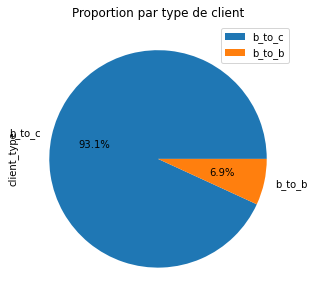

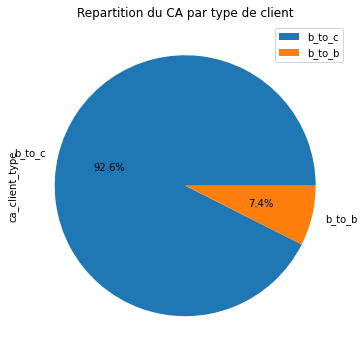

In [78]:
# Proportion des ventes entre professionnels et particuliers
plt.figure(figsize=(7,5))
df['client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Proportion par type de client')

#Création de la table ca_client_type qui représente le CA par type de client
ca_client_type=df.groupby(["client_type"])["price"].sum().reset_index()
ca_client_type.rename(columns={"price":"ca_client_type"},inplace= True)
ca_client_type=ca_client_type.sort_values(by="ca_client_type", ascending=False)

plt.figure(figsize=(14,6))
ax2 = plt.subplot(121, aspect='equal')
ca_client_type.plot(kind='pie',
               y = 'ca_client_type',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=ca_client_type["client_type"],
               legend = True)
plt.title("Repartition du CA par type de client")
plt.show()

La repartion des clients est proportionnelle au CA genéré par chaque type de client.

### 2 - Profil par genre

Proportion et répartition du CA 

In [79]:
#Repartition des clients par âge 
cl_age=df_b2c .groupby(["age"])["client_id"].count().reset_index()
cl_age.rename(columns={"client_id":"nbre_client"},inplace= True)
#cl_age=cl_age.sort_values(by="nbre_client", ascending=False)

#Repartition des clients par sexe
cl_sex=df_b2c.groupby(["sex"])["client_id"].count().reset_index()
cl_sex.rename(columns={"client_id":"nbre_client"},inplace= True)
#cal_sex=cal_sex.sort_values(by="nbre_client", ascending=False)

#Repartition du CA clients par âge 
ca_age=df_b2c .groupby(["age"])["price"].sum().reset_index()
ca_age.rename(columns={"price":"ca_client"},inplace= True)
#cl_age=cl_age.sort_values(by="nbre_client", ascending=False)

#Repartition du CA clients par sexe
ca_sex=df_b2c.groupby(["sex"])["price"].sum().reset_index()
ca_sex.rename(columns={"price":"ca_client"},inplace= True)
#cal_sex=cal_sex.sort_values(by="nbre_client", ascending=False)

In [80]:
ca_cl_age =pd.merge(cl_age, ca_age, on=["age"], how="left")
ca_cl_age['ca_en_1000']=round((ca_cl_age["ca_client"]/100),2)
ca_cl_age

,age,nbre_client,ca_client,ca_en_1000
0,20,14769,591414.23,5914.14
1,21,4238,172831.75,1728.32
2,22,4468,178799.11,1787.99
3,23,4161,174347.66,1743.48
4,24,4299,160576.49,1605.76
...,...,...,...,...
71,91,315,5089.62,50.90
72,92,293,4803.64,48.04
73,93,164,2691.19,26.91
74,94,222,3959.24,39.59


### Proportion et répartition du CA 

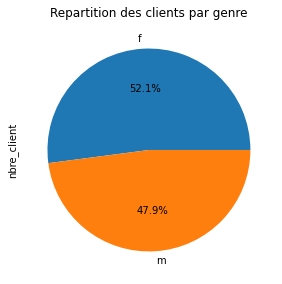

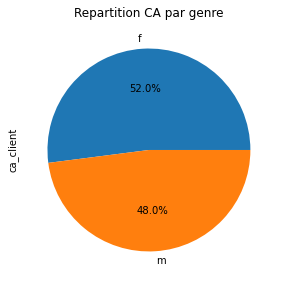

In [81]:
# Graphiques genre

plt.figure(figsize=(10,6))
ax2 = plt.subplot(121, aspect='equal')
cl_sex.plot(kind='pie',
               y = 'nbre_client',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=cl_sex["sex"],
               legend = False)
plt.title("Repartition des clients par genre")

plt.figure(figsize=(10,6))
ax2 = plt.subplot(122, aspect='equal')
ca_sex.plot(kind='pie',
               y = 'ca_client',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=ca_sex["sex"],
               legend = False)
plt.title("Repartition CA par genre")

plt.show()

Le chiffre d'affaires généré est proportionnel au genre, avec une répartition presque égale entre les deux sexes.

### 3- Profil par âge
Proportion et répartition du CA par âge

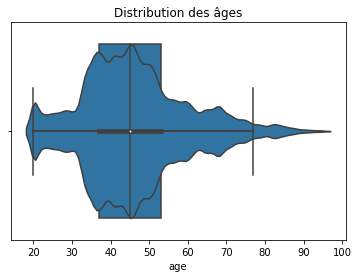

In [82]:
#Distribution des âges
sns.boxplot(data=df_b2c, x='age', showfliers=False)
sns.violinplot(data=df_b2c, x='age', showfliers=False)
plt.title('Distribution des âges')

plt.show()

L'âge moyen des clients est de 45 ans, la majorité ayant entre 35 et 52 ans.

 En vert le nombre de client
 En rouge le CA 


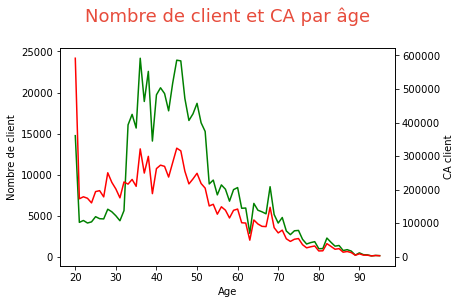

<Figure size 1440x576 with 0 Axes>

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = ca_cl_age["age"]
y1 =ca_cl_age['nbre_client']
y2 = ca_cl_age["ca_client"]

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(20,8))
ax2 = ax1.twinx()
ax1.plot(x,y1,color="g")
ax2.plot(x,y2,color="r")

ax1.set_xlabel('Age')
ax1.set_ylabel(r"Nombre de client")
ax2.set_ylabel(r"CA client")
ax1.set_title("Nombre de client et CA par âge\n", fontsize=18, color='#e74c3c')
#fig=plt.legend('y2','y1',loc="upper right")
#plt.gca().legend(('y2','y1'))
print(" En vert le nombre de client\n En rouge le CA ")
plt.show()


Le **CA** des clients âgés de **plus de 50 ans** est sensiblement proportionnel à leur nombre.

Les clients âgés de **18 à 30 ans** génèrent **25 %** du CA total alors qu'ils ne représentent que **10 %** de l'ensemble de la clientèle.

Les clients des classes d'âge **[30, 40[** et **[40, 50[** sont sensiblement similaires en termes de proportion et réalisent pratiquement le même **CA**, soit **24 %** par classe d'âge.



### 4- Genre et tranche d'âge

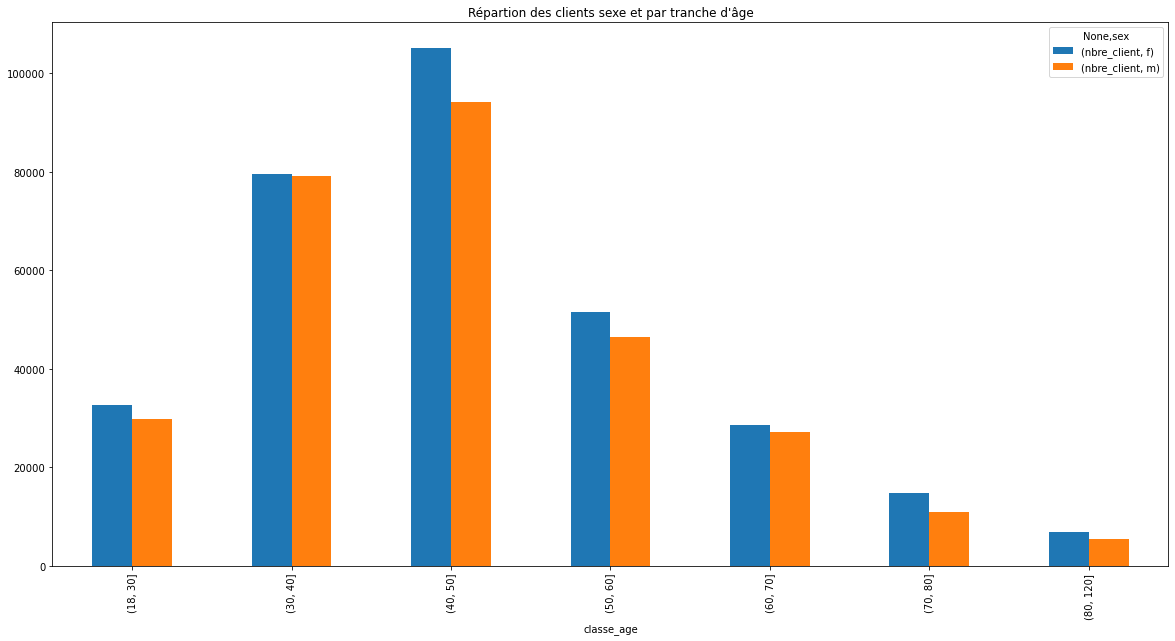

In [84]:
#Repartition des clients par tranche d'âge 
cl_age_sex=pd.DataFrame(df_b2c.groupby(["classe_age","sex"])["client_id"].count())
cl_age_sex.rename(columns={"client_id":"nbre_client"},inplace= True)
cl_age_sex=cl_age_sex.sort_values(by="nbre_client", ascending=False)
cl_age_sex=cl_age_sex.unstack(level=1)

cl_age_sex.plot(kind='bar',title="Répartion des clients sexe et par tranche d'âge", figsize=(20,10),subplots=False)

plt.show()


Il ya uniformité entre le CA réalisé par genre et par âge

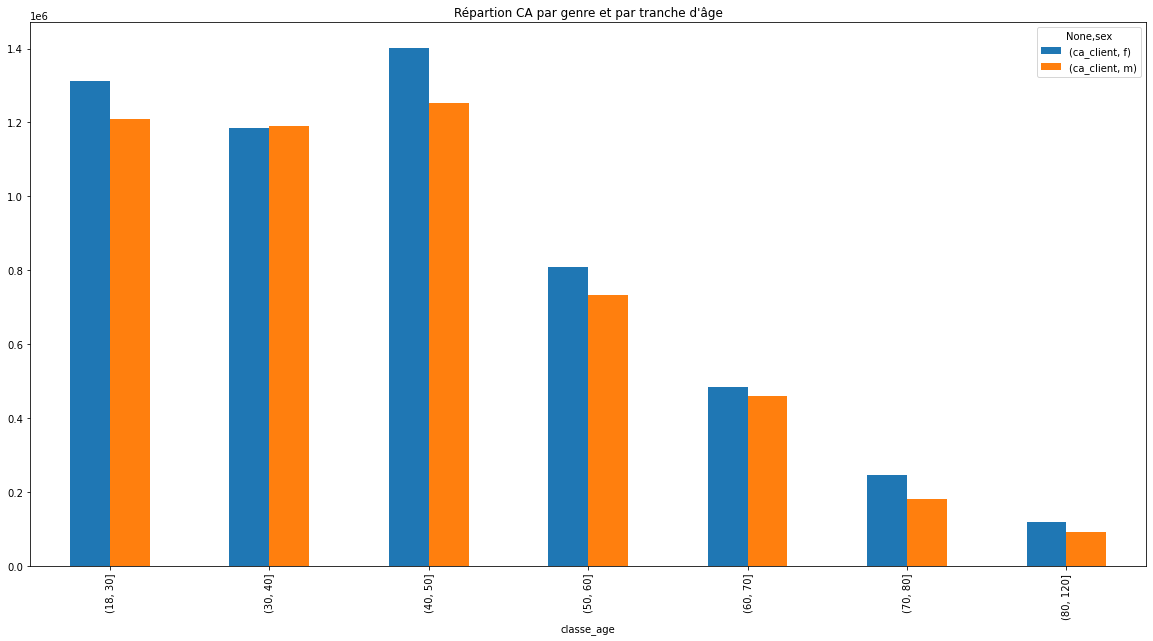

In [85]:

#Repartition du Ca par tranche d'âge 
ca_age_sex=pd.DataFrame(df_b2c.groupby(["classe_age","sex"])["price"].sum())
ca_age_sex.rename(columns={"price":"ca_client"},inplace= True)
ca_age_sex=ca_age_sex.sort_values(by="ca_client", ascending=False)
ca_age_sex=ca_age_sex.unstack(level=1)

ca_age_sex.plot(kind='bar',title="Répartion CA par genre et par tranche d'âge", figsize=(20,10),subplots=False)

plt.show()
print()

**Répartition des clients et du CA par classe d'âge**


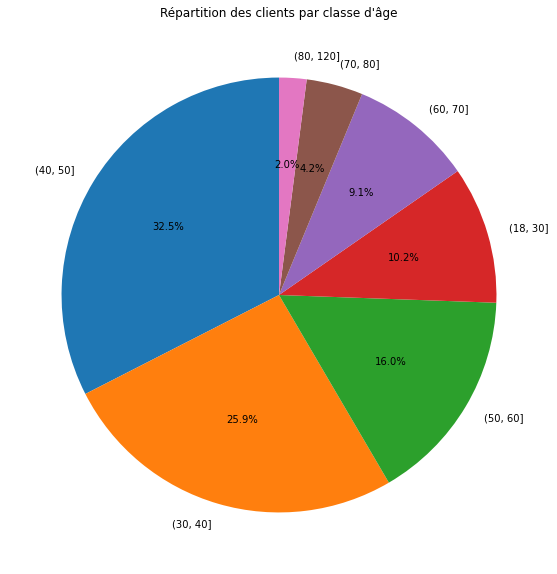

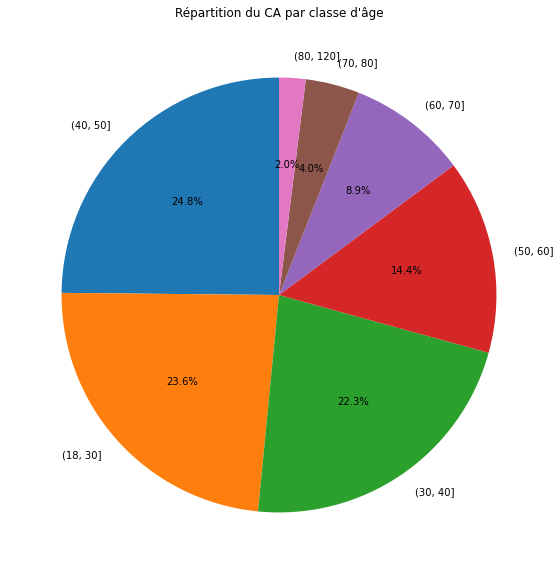

In [86]:
#Répartition des clients par classe d'âge
cl_age_=pd.DataFrame(df_b2c.groupby(["classe_age"])["client_id"].count())
cl_age_.rename(columns={"client_id":"nbre_client"},inplace= True)
cl_age_=cl_age_.sort_values(by="nbre_client", ascending=False)
cl_age_=cl_age_.unstack(level=1)
cl_age_.plot(
    kind='pie',
    y='nbre_client',
    labels=cl_age_.index.get_level_values('classe_age'),  
    autopct='%1.1f%%',  
    startangle=90,  
    shadow=False,  
    legend=False,
    figsize=(14, 10)
)

plt.title("Répartition des clients par classe d'âge")
plt.ylabel('') 
plt.show()

#Répartition du CA par classe d'âge

cl_age_=pd.DataFrame(df_b2c.groupby(["classe_age",])["price"].sum())
cl_age_.rename(columns={"price":"CA"},inplace= True)
cl_age_=cl_age_.sort_values(by="CA", ascending=False)
cl_age_=cl_age_.unstack(level=1)
cl_age_.plot(
    kind='pie',
    y='CA',
    labels=cl_age_.index.get_level_values('classe_age'),  
    autopct='%1.1f%%',  
    startangle=90,  
    shadow=False,  
    legend=False,
    figsize=(14, 10)
)

plt.title("Répartition du CA par classe d'âge")
plt.ylabel('') 
plt.show()

Proportions

**Entre 18 et 30 ans** : 10,2% = 23,6% du CA

**Entre 30 et 50 ans** :76,4% = 47,1% du CA

**Plus 50 ans** : 13,4% = 29,3% du CA

## III- Client b tob : Étude des corrélations (âge, genre, montant total des achats, fréquence d'achat, panier moyen)

### 1- Corrélation entre le genre d’un client et les catégories des livres achetés


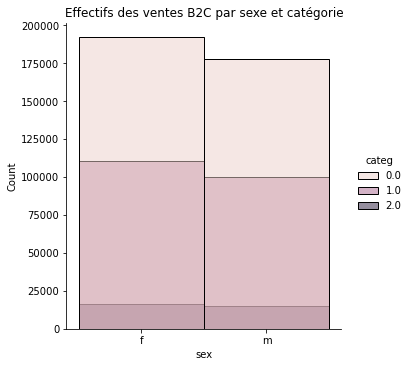

In [87]:
#Repartition des clients en fonction du genre et de la catégorie des produits achétés
sns.displot(data=df_b2c, x='sex', hue='categ')
plt.title('Effectifs des ventes B2C par sexe et catégorie')

plt.show()

Les **effectifs** sont proportionnels au **volume de vente** réalisé.

Les **hommes** achètent sensiblement pareil que les **femmes**.


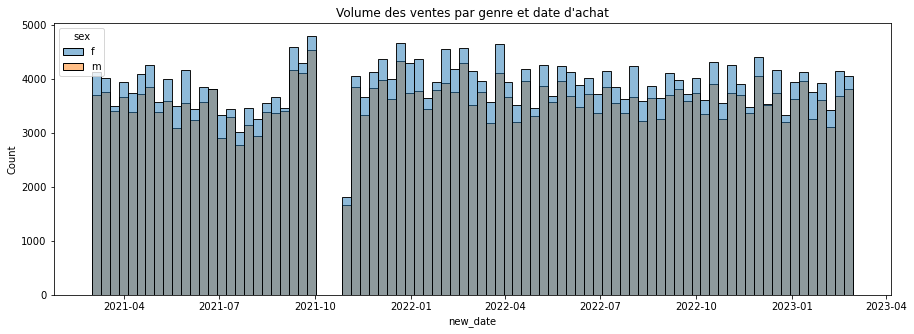

In [88]:
# Volume de vente par genre et par date d'achat
plt.figure(figsize=(15,5))
sns.histplot(data=df_b2c, x='new_date', hue='sex')
plt.title('Volume des ventes par genre et date d\'achat')
plt.show()

La **saisonnalité des achats** est la même pour les deux genres. La visualisation graphique montre que les deux variables sont **indépendantes**.

Nous allons effectuer le **test statistique du Chi-2 d'indépendance**, afin d'accepter ou de rejeter l'hypothèse **H0** : les deux variables sont indépendantes. Le seuil de la **p-valeur** est fixé à **0,05**.


In [89]:
#Table de contingence

cont_table=pd.crosstab(df_b2c["sex"],df_b2c["categ"])
print('Table de contingence')

cont_table



Table de contingence


categ,0.0,1.0,2.0
sex,,,
f,192025,110550,16429
m,178044,100227,15351


In [90]:

import scipy.stats as st
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_table)
print(f"khi2 :{st_chi2}")

print(f"Nombre de degrés de liberté: {st_dof}")
print(f"P value: {st_p}")
print(f"Tableau des fréquences attendues : {st_exp}")

khi2 :18.75788251563821
Nombre de degrés de liberté: 2
P value: 8.448460261159054e-05
Tableau des fréquences attendues : [[192700.75262232 109754.90120889  16548.34616879]
 [177368.24737768 101022.09879111  15231.65383121]]


La **p-valeur** est inférieure à **0,05**, ce qui signifie que l'hypothèse **H0** est rejetée.

Il existe une **faible dépendance** entre les variables **sexe** et **catégorie**.


### 2-Test de normalité sur les variables "age" et "ca_panier"(montant total des achats par panier)

### AGE

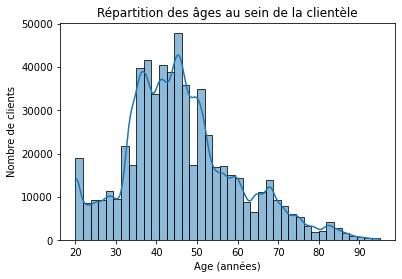

In [91]:
sns.histplot(data=df_b2c["age"],
             bins=40,
             kde=True)
plt.title("Répartition des âges au sein de la clientèle")
plt.ylabel("Nombre de clients")
plt.xlabel("Age (années)")
plt.show()

Graphiquement, la variable **âge** ne suit pas une **distribution normale**.

Nous allons effectuer le **test de normalité** en posant l'hypothèse **H0** : la distribution par âge suit une loi normale.



In [92]:
# Test de Normalite de la repartition des ages:
print(st.anderson(df_b2c["age"], dist="norm"))

AndersonResult(statistic=4996.998227146571, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [93]:
print(st.shapiro(df_b2c["age"]))
print(st.jarque_bera(df_b2c["age"]))
print(st.kstest(df_b2c["age"], cdf="norm"))

ShapiroResult(statistic=0.9712085127830505, pvalue=0.0)
Jarque_beraResult(statistic=37482.054679460416, pvalue=0.0)


C:\Users\33618\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


KstestResult(statistic=1.0, pvalue=0.0)


La **p-valeur** est égale à **zéro**, ce qui est inférieur à **0,05**.

Nous rejetons donc **H0** et confirmons que la distribution de la variable ne suit pas une **loi normale**.



### CA_PANIER

In [94]:
#Création du df achat_age qui représente le montant total des achats par panier
achat_age= df_b2c.groupby(["session_id","age",])["price"].sum().reset_index()
achat_age.rename(columns={"price":"ca_panier"},inplace= True)

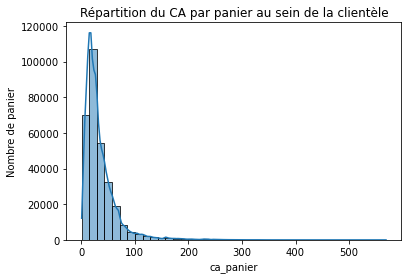

In [95]:
sns.histplot(data=achat_age["ca_panier"],
             bins=40,
             kde=True)
plt.title("Répartition du CA par panier au sein de la clientèle")
plt.ylabel("Nombre de panier")
plt.xlabel("ca_panier")
plt.show()

Graphiquement, le **montant total des achats par panier** ne suit pas une **distribution normale**.

Nous allons effectuer le **test de normalité** en posant l'hypothèse **H0** : la distribution par montant total des achats par panier suit une loi normale.


In [96]:
print(st.shapiro(achat_age["ca_panier"]))
print(st.jarque_bera(achat_age["ca_panier"]))
print(st.kstest(achat_age["ca_panier"], cdf="norm"))

ShapiroResult(statistic=0.7126902341842651, pvalue=0.0)
Jarque_beraResult(statistic=4881922.628658285, pvalue=0.0)
KstestResult(statistic=0.9977169787535131, pvalue=0.0)


C:\Users\33618\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La **p-valeur** est égale à **zéro**, ce qui est inférieur à **0,05**.

Nous rejetons donc **H0** et confirmons que la distribution du **montant total des achats par panier** ne suit pas une **loi normale**.


### 3- Corrélation entre l’âge des clients et le montant total des achats

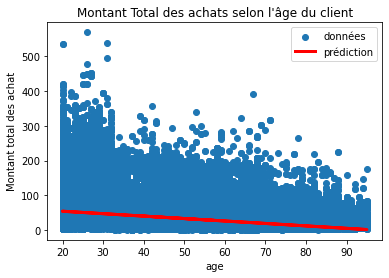

In [97]:
# Prenons le df achat_age qui représente le montant total des achats par panier 
#afin de vsualiser et faire une regression linéaire
X = achat_age.age.values.reshape(-1,1)
Y = achat_age.ca_panier
lr = LinearRegression()
lr.fit(X, Y)

plt.title("Montant Total des achats selon l\'âge du client")
plt.scatter(X, Y, label="données")
plt.plot(X, lr.predict(X), color='red', linewidth=3, label="prédiction")
plt.ylabel("Montant total des achat")
plt.xlabel("age")
plt.legend()
           
plt.show()

Graphiquement, on constate que le **CA** généré baisse avec l'âge (la **régression linéaire** est négative).

Le **test statistique de Pearson** va être utilisé pour confirmer ou rejeter l'hypothèse :

**H0** : il n'y a pas de **corrélation** entre les deux variables.


In [98]:
import scipy.stats as st
st.pearsonr(achat_age["age"], achat_age["ca_panier"])

(-0.32999983690233625, 0.0)

La **p-valeur** est < **0,05** : **H0** est rejetée (il existe une **corrélation** entre le **CA** et l'**âge**, bien que sa forme ne soit pas linéaire).

Le **coefficient** est plus proche de **zéro** que de **1**. Par conséquent, on peut affirmer que plus les consommateurs sont âgés, plus le montant total de leurs achats est faible (**faible corrélation**).


### 4- Corrélation entre l’âge des clients la taille du panier moyen 

In [99]:

# création de la table d1 qui représente nombre de session/ client 
d1= df_b2c.groupby(["client_id","age"])["session_id"].count().reset_index()


# création de la table d2 qui représente ca/ client
d2= df_b2c.groupby(["client_id","age"])["price"].sum().reset_index()

# fusion d1 et d2


client_pa =pd.merge(d2,d1, on=["client_id","age"], how="left")

# renommage des colonnes
client_pa.rename(columns={"session_id":"nbre_session","price":"ca"},inplace= True)

# panier moyen par client
client_pa["panier_moyen"]=round((client_pa["ca"]/client_pa["nbre_session"]),2)

#fréquence_achats par client

client_pa["fréquence_achats"]=round((client_pa["nbre_session"]/23),2)
client_pa=client_pa.sort_values(by="ca", ascending=True)
client_pa.head()

,client_id,age,ca,nbre_session,panier_moyen,fréquence_achats
7913,c_8140,53,8.30,2,4.15,0.09
7884,c_8114,62,9.98,2,4.99,0.09
1555,c_240,26,11.06,1,11.06,0.04
4041,c_4648,20,11.20,1,11.20,0.04
1990,c_2793,91,12.99,1,12.99,0.04


moyenne de l'étiquette : 22.085875029089966
RMSE: 12.9867928177164
% de réduction : 0.5880135063976912
0.2589996402172001


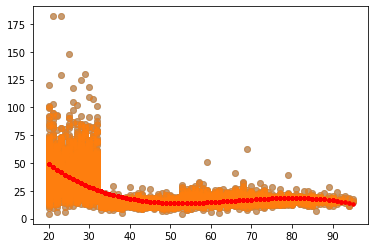

In [100]:
#Visualisation graphique et regression polynomiale

X = client_pa.age.values.reshape(-1,1)
y = client_pa.panier_moyen
plt.scatter(X,y, alpha=0.5);

linear_model = LinearRegression().fit(X,y) 
preds = linear_model.predict(X)

# y_mean 
label_mean = np.mean(y) 
print('moyenne de l\'étiquette :', label_mean )
# RMSE 
rmse = np.sqrt( mean_squared_error(y, preds)) 
print('RMSE:', rmse )
# % de réduction 
print('% de réduction :',rmse/label_mean)
print(linear_model.score(X,y))

# Instance 
poly2 = PolynomialFeatures(degree=3, include_bias=False) 
X_poly = poly2.fit_transform(X)
# Ajuster le modèle linéaire avec des fonctionnalités poly 
poly_model = LinearRegression().fit(X_poly,y) 
poly_pred = poly_model.predict(X_poly)
# Tracer 
plt.scatter(X,y, alpha=0.5) 
plt.plot(X, poly_pred, color='red', linestyle='', marker='.', lw=0.1);

Entre **18 et 30 ans**, le **panier moyen** se situe sensiblement à **90€**.

Au-delà de **30 ans**, le panier moyen semble linéaire entre **10 et 25€**.

En se basant sur le graphique, nous pouvons dire que les variables sont **corrélées**.

Le **test statistique de Pearson** va être utilisé pour confirmer ou rejeter l'hypothèse :

**H0** : il n'y a pas de **corrélation** entre les deux variables.


In [101]:
st.pearsonr(client_pa["age"], client_pa["panier_moyen"])

(-0.5089200725233778, 0.0)

La **p-valeur** est < **0,05** : **H0** est rejetée (il existe une **corrélation** entre le **panier moyen** et l'**âge**, bien que sa forme ne soit pas linéaire).



### 5- Corrélation entre l’âge des clients et la fréquence d’achat


moyenne de l'étiquette : 3.099356527810094
RMSE: 2.8511233185341642
% de réduction : 0.9199081464011746
0.0010804867948320807


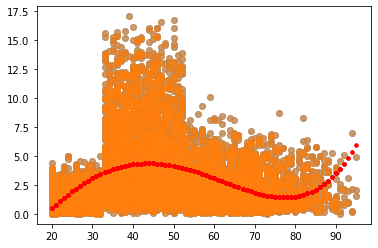

In [102]:
X = client_pa.age.values.reshape(-1,1)
y = client_pa.fréquence_achats
plt.scatter(X,y, alpha=0.5);

linear_model = LinearRegression().fit(X,y) 
preds = linear_model.predict(X)

# y_mean 
label_mean = np.mean(y) 
print('moyenne de l\'étiquette :', label_mean )
# RMSE 
rmse = np.sqrt( mean_squared_error(y, preds)) 
print('RMSE:', rmse )
# % de réduction 
print('% de réduction :',rmse/label_mean)
print(linear_model.score(X,y))

# Instance 
poly2 = PolynomialFeatures(degree=4, include_bias=False) 
X_poly = poly2.fit_transform(X)
# Ajuster le modèle linéaire avec des fonctionnalités poly 
poly_model = LinearRegression().fit(X_poly,y) 
poly_pred = poly_model.predict(X_poly)
# Tracer 
plt.scatter(X,y, alpha=0.5) 
plt.plot(X, poly_pred, color='red', linestyle='', marker='.', lw=0.1);

Trois groupes de clients se distinguent :

- **Entre 18 et 30 ans** : la fréquence d'achat se situe sensiblement à **4**.
- **Entre 30 et 50 ans** : ils achètent le plus souvent (la fréquence se situe entre **4 et 17,5**).
- **Après 50 ans** : la fréquence d'achat baisse sensiblement avec l'âge pour atteindre au maximum **7,5**, mais elle reste plus élevée que celle des **18-30 ans**.

En se basant sur le graphique, nous pouvons dire que les variables sont **corrélées**.

Le **test statistique de Pearson** va être utilisé pour confirmer ou rejeter l'hypothèse :

**H0** : il n'y a pas de **corrélation** entre les deux variables.



In [103]:
st.pearsonr(client_pa["age"], client_pa["fréquence_achats"])

(0.03287075896343302, 0.002306572042379856)

La **p-valeur** est < **0,05** : **H0** est rejetée.

Il existe une **corrélation** entre la **fréquence d'achat** et l'**âge**, bien que sa forme ne soit pas linéaire.


### 6- Corrélation entre l’âge des clients et les catégories des livres achetés

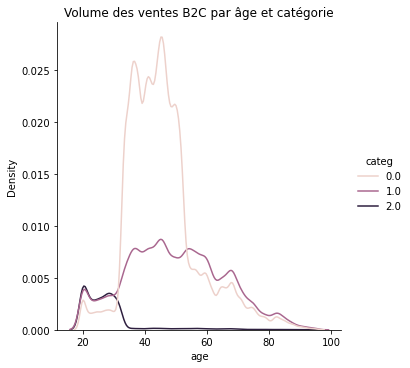

In [104]:
#Repartition des clients en fonction du genre et de la catégorie des produits achétés

sns.displot(data=df_b2c, x='age', hue='categ',kind='kde')
plt.title('Volume des ventes B2C par âge et catégorie')

plt.show()

La **p-valeur** est < **0,05** : **H0** est rejetée.

Il existe une **corrélation** entre la **fréquence d'achat** et l'**âge**, bien que sa forme ne soit pas linéaire.

---

Les produits de la **catégorie 0** sont achetés par toutes les tranches d'âge, mais principalement par la tranche **30-50 ans**.

La **catégorie 1** est également achetée par toutes les tranches d'âge, mais principalement par les **30-60 ans**.

La **catégorie 2** est essentiellement achetée par les **18-30 ans**.


**Distribution des catégories par âge**

Distribution des catégories par âge


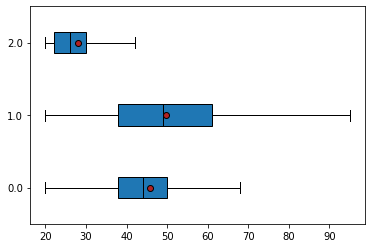

η 2 = 0.11313227712747578 


In [105]:
X2 = "categ" # qualitative
Y2 = "age" # quantitative

modalites = df_b2c[X2].unique()
groupes = []
for m in modalites:
    groupes.append(df_b2c[df_b2c[X2]==m][Y2])

  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
print("Distribution des catégories par âge")
plt.show()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


p=eta_squared(df_b2c[X2],df_b2c[Y2])

print(f"η 2 = {p} ")

Le **η²** (eta squared) est proche de **0.2**, ce qui laisse penser que la **variance** de l'âge est expliquée par les **catégories de produits**.

- **Catégorie 0** : Large distribution des âges, attirant un large éventail de clients de tous âges.
- **Catégorie 1** : Concentrée autour de **50 ans**, principalement des clients d'âge moyen.
- **Catégorie 2** : Majoritairement des clients jeunes, principalement en dessous de **40 ans**.

Le **test statistique de Kruskal** va être utilisé pour confirmer ou rejeter l'**hypothèse nulle** selon laquelle la **médiane** est la même pour tous les groupes de données.


In [106]:
#Repartition du clients en fonction de la tranche d'âge et de la catégorie des produits achétés
pp=df_b2c.groupby(["classe_age","categ"])["id_prod"].count().reset_index()
pp.rename(columns={"id_prod":"nbre_achat"},inplace= True)
pp=pp.sort_values(by="classe_age", ascending=True)
pp

,classe_age,categ,nbre_achat
0,"(18, 30]",0.0,13739
1,"(18, 30]",1.0,23938
2,"(18, 30]",2.0,24928
3,"(30, 40]",0.0,114587
4,"(30, 40]",1.0,39622
5,"(30, 40]",2.0,4544
6,"(40, 50]",0.0,149873
7,"(40, 50]",1.0,48612
8,"(40, 50]",2.0,734
11,"(50, 60]",2.0,702


In [107]:
pp1 = pp.set_index('categ')
pp1.head()

,classe_age,nbre_achat
categ,,
0.0,"(18, 30]",13739
1.0,"(18, 30]",23938
2.0,"(18, 30]",24928
0.0,"(30, 40]",114587
1.0,"(30, 40]",39622


In [108]:
#Repartition du clients en fonction de la tranche d'âge et de la catégorie des produits achétés
cal2=pd.DataFrame(df_b2c.groupby(["classe_age","categ"])["id_prod"].count())
cal2.rename(columns={"id_prod":"nbre_achat"},inplace= True)
#cal1=v_oct_2021.sort_values(by="ca_cli", ascending=True)
cal2=cal2.unstack(level=0)
cal2.reset_index()
cal2

nbre_achat                                                       
classe_age   (18, 30] (30, 40] (40, 50] (50, 60] (60, 70] (70, 80] (80, 120]
categ                                                                       
0.0             13739   114587   149873    51881    23723    11049      5217
1.0             23938    39622    48612    45442    31546    14493      7124
2.0             24928     4544      734      702      535      209       128

In [109]:
g_0=cal2["nbre_achat"].iloc[0]
g_1=cal2["nbre_achat"].iloc[1]
g_2=cal2["nbre_achat"].iloc[2]
result = st.kruskal(g_0, g_1, g_2 )

print(result)

KruskalResult(statistic=9.818181818181827, pvalue=0.0073791936408935735)


La **statistique de test** est égale à **9,84** et la **valeur de p** correspondante est de **0,007**.

Comme la **valeur p** est inférieure à **0,05**, nous rejetons l'**hypothèse nulle** selon laquelle la **médiane** est la même pour tous les groupes de données.

Il existe donc une **corrélation** entre l'**âge** et la **catégorie des produits** (la croissance de la médiane des ventes par classe d'âge n'est pas la même pour les trois catégories).


In [110]:
# Encodage de la variablee  'sex" (2 modalités : 2 pour les femmes et 1 pour les hommes)

df_b2c['code_sex'] = 2
df_b2c['code_sex'].loc[df['sex']=="m"]=1

C:\Users\33618\AppData\Local\Temp\ipykernel_12184\2758662365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b2c['code_sex'] = 2
C:\Users\33618\AppData\Local\Temp\ipykernel_12184\2758662365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b2c['code_sex'].loc[df['sex']=="m"]=1


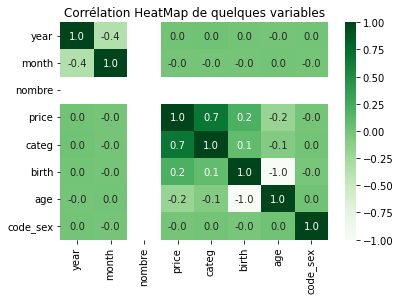

In [111]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(df_b2c.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap de quelques variables')

plt.show()

Il existe une **très forte corrélation** entre le **prix des articles** et les **catégories d'articles**. En revanche, il y a une **faible corrélation** entre le **prix** et l'**âge**.


C:\Users\33618\AppData\Local\Temp\ipykernel_12184\1458926994.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(client_pa.corr(), dtype=np.bool)),


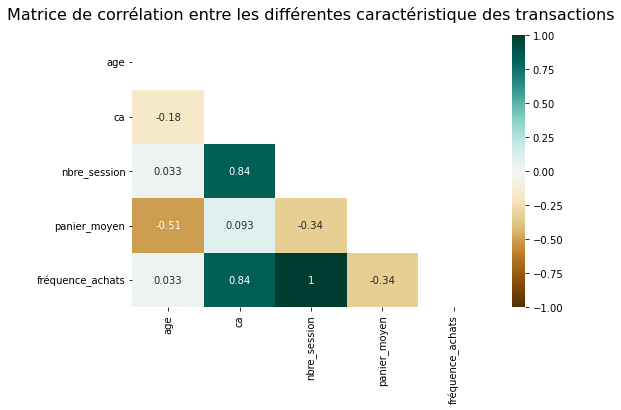

In [112]:
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(
    client_pa.corr(), 
    mask=np.triu(np.ones_like(client_pa.corr(), dtype=np.bool)), 
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matrice de corrélation entre les différentes caractéristique des transactions',
                  fontdict={'fontsize':16}, pad=16)
plt.show()

Il existe une **forte corrélation** entre l'**âge** et le **panier moyen**, ainsi qu'entre le **CA**, la **fréquence d'achat**, le **nombre de sessions**, et le **panier moyen**.

Bien que **très faible**, il existe une corrélation entre :
- le **panier moyen** et la **fréquence d'achat**,
- l'**âge** et le **CA**,
- l'**âge** et la **fréquence d'achat**.


# III- Zoom sur les clients b to b

**Volume d'achats des clients b to b, par catégorie**

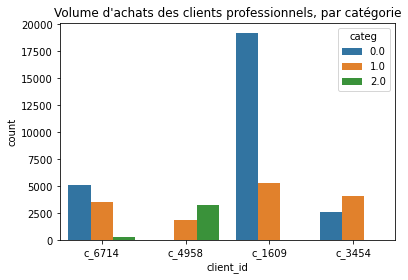

In [113]:

sns.countplot(data=df_b2b, x='client_id', hue='categ')
plt.title('Volume d\'achats des clients professionnels, par catégorie')

plt.show()



Il ya une forte disparité au niveau des catégories achetés par chaque client.

**Distribution des prix d\'achat des professionnels**

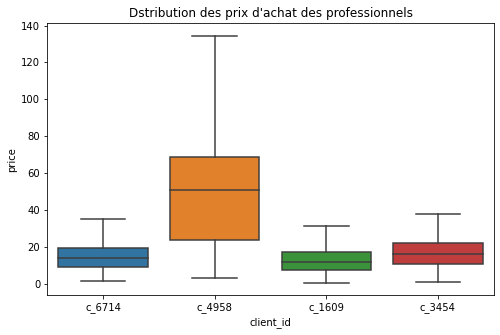

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_b2b, y='price', x='client_id', showfliers=False)
plt.title('Dstribution des prix d\'achat des professionnels')

plt.show()



Le client **c_4958** est celui qui achète le plus de livres à **prix élevé** (il n'achète que des produits de **catégorie 1** et **2**).

Les autres suivent la même tendance avec une **médiane** de **18€**.



**Repartion volme de vente et CA b to b**

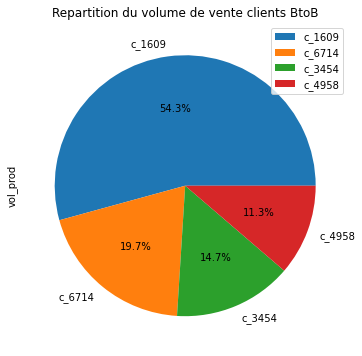

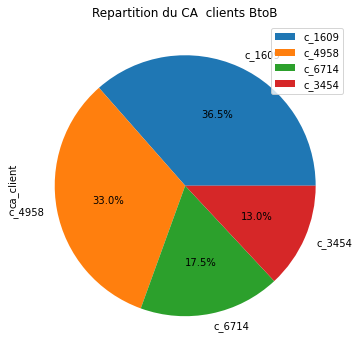

In [115]:

#Création de la table ca_client_b2b_v qui représente le volume de vente par  client btob
ca_client_b2b_v=df_b2b.groupby(["client_id"])["id_prod"].count().reset_index()
ca_client_b2b_v.rename(columns={"id_prod":"vol_prod"},inplace= True)
ca_client_b2b_v=ca_client_b2b_v.sort_values(by="vol_prod", ascending=False)

plt.figure(figsize=(14,6))
ax2 = plt.subplot(121, aspect='equal')
ca_client_b2b_v.plot(kind='pie',
               y = 'vol_prod',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=ca_client_b2b_v["client_id"],
               legend = True)
plt.title("Repartition du volume de vente clients BtoB")
plt.show()


#Création de la table ca_client_b2b qui représente le CA par  client btob
ca_client_b2b=df_b2b.groupby(["client_id"])["price"].sum().reset_index()
ca_client_b2b.rename(columns={"price":"ca_client"},inplace= True)
ca_client_b2b=ca_client_b2b.sort_values(by="ca_client", ascending=False)

plt.figure(figsize=(14,6))
ax2 = plt.subplot(121, aspect='equal')
ca_client_b2b.plot(kind='pie',
               y = 'ca_client',
               ax=ax2,
               autopct='%1.1f%%', 
               #startangle=90,
               shadow=False,
               labels=ca_client_b2b["client_id"],
               legend = True)
plt.title("Repartition du CA  clients BtoB")
plt.show()

Les clients c_4958 et c_1609 totalisent 70% du ventes dess clients btob



Client c_6714


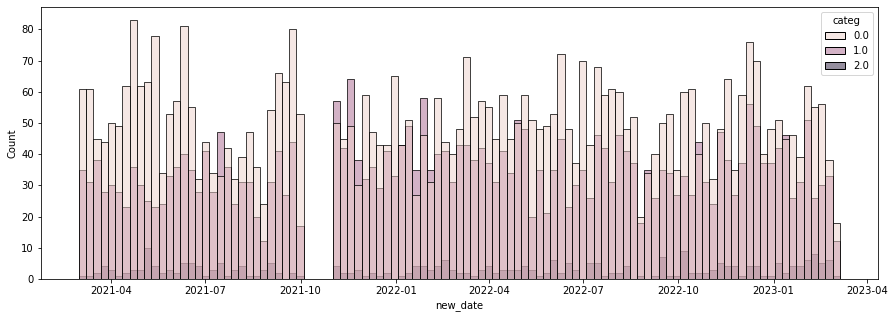

Client c_4958


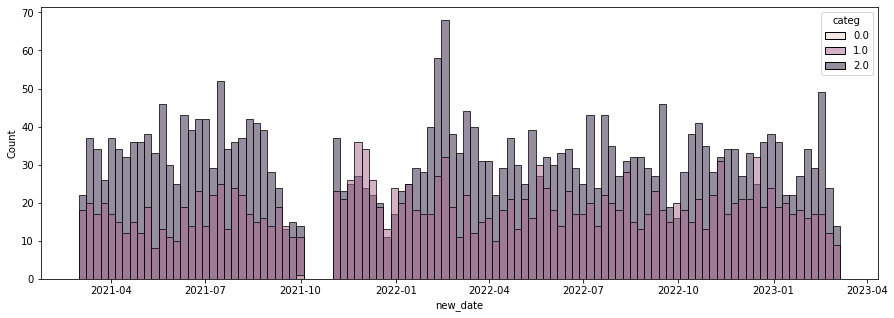

Client c_1609


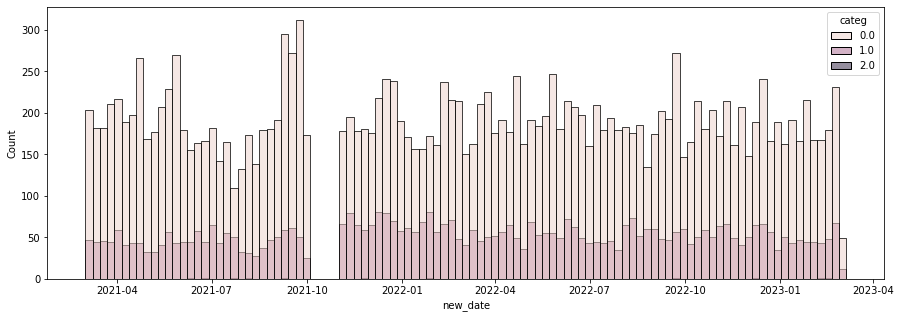

Client c_3454


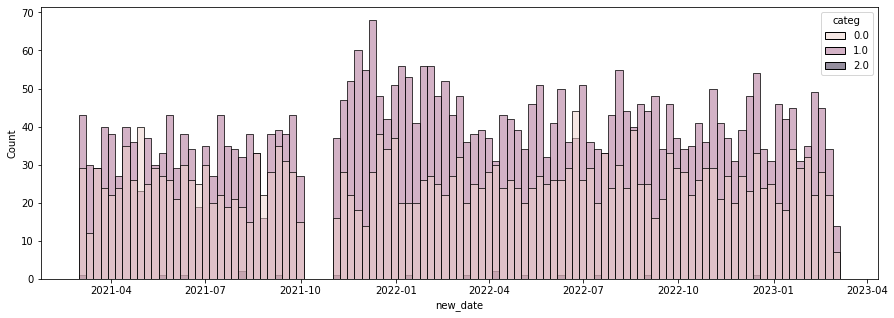

In [116]:

# périodicité des achats
for i in df_b2b['client_id'].unique():
    print('Client', i)
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_b2b[df_b2b['client_id']==i], x='new_date', hue='categ', binwidth=7)
    plt.show()

On n'observe pas de saisonalité au niveau des achats


# E. Analyse de la Concentration des Ventes
   - Courbe de Lorenz : répartition du chiffre d'affaires entre différents profils clients

In [117]:
# création de la table ca_client qui représente client
ca_client= df.groupby(["client_id"])["price"].sum().reset_index()
ca_client.rename(columns={"price":"ca"},inplace= True)
ca_client=ca_client.sort_values(by="ca", ascending=False)
ca_client

,client_id,ca
677,c_1609,312755.08
4387,c_4958,282654.61
6336,c_6714,149847.59
2723,c_3454,111798.63
2108,c_2899,5214.05
...,...,...
1991,c_2793,12.99
4043,c_4648,11.20
1556,c_240,11.06
7888,c_8114,9.98


In [118]:
# création de la table ca_client qui représente client b to c
ca_client_b2c= df_b2c.groupby(["client_id"])["price"].sum().reset_index()
ca_client_b2c.rename(columns={"price":"ca"},inplace= True)
ca_client_b2c=ca_client_b2c.sort_values(by="ca", ascending=False)

Indice de Gini appliqué au CA est : 0.4474063945323581


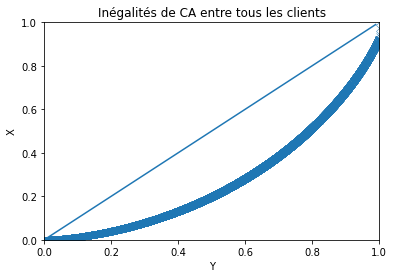

Indice de Gini appliqué au CA est : 0.4037361876105465


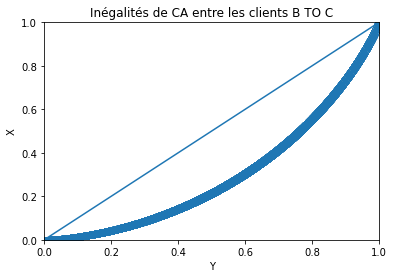

In [119]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Indice de Gini appliqué au CA est :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(ca_client['ca'], 'Inégalités de CA entre tous les clients')

# Inégalité des chiffres d'affaires annuels des clients B TO Cabs
lorenz(ca_client_b2c['ca'], 'Inégalités de CA entre les clients B TO C')

50% du CA est représenté par 80% des clients . il existe une inégalité de CA entre les clients

## Indice de Gini

- **Indice de Gini Global** : Avec une valeur de **0.4474**, l'indice montre une **concentration modérée** du CA parmi tous les clients, confirmant qu'un petit groupe (notamment les **B2B**) influence de manière disproportionnée le chiffre d'affaires.

- **Indice de Gini pour les clients B2C** : L'indice est de **0.4037**, ce qui indique une **distribution plus équitable** du CA parmi les clients B2C par rapport à l'ensemble des clients, bien que des inégalités persistent.


## Synthèse - Analyse des comportements clients

### Deux segments principaux ont été identifiés :

- **B2B** : Ce segment représente **7 %** de la clientèle et contribue à **7 %** du chiffre d'affaires global, ce qui indique un **revenu élevé par client**.
- **B2C** : Constituant la **majorité des clients**, ce segment contribue au chiffre d'affaires de manière proportionnelle à sa part dans la base de données, suggérant une **répartition équilibrée**.

### Concernant les clients B2C :

L'**âge moyen** des clients est de **45 ans**, la plupart se situant entre **35 et 52 ans**.

On observe une répartition presque égale entre **hommes et femmes**, tant en nombre de clients qu'en chiffre d'affaires généré, ce qui montre que l'offre s'adresse de manière équilibrée aux deux genres. Toutefois, l'analyse révèle une **segmentation fine** basée sur l'âge, permettant d'identifier des dynamiques et des comportements d'achat spécifiques à chaque groupe :

1. **Segment des 18-30 ans** : Dynamique, Prémium, stratégique, très fort potentiel de croissance.
   - Il représente **10 %** de la clientèle mais génère **24 %** du chiffre d’affaires total, indiquant une influence disproportionnée.
   - Les clients de ce segment ont un **panier moyen élevé** d’environ **90 €**, privilégiant des produits de **catégorie 2** (haut de gamme).
   - Bien que leur fréquence d’achat soit inférieure à celle des segments plus âgés, leur dynamisme et leur attrait pour les produits premium en font un **groupe stratégique** à **fort potentiel de croissance**.


2. **Segment des 30-50 ans** : Stable, engagés, pilier, fort potentiel de croissance.
   - Ce groupe constitue le segment le **plus important en nombre de clients** (76 %) et génère **47 %** du chiffre d’affaires, ce qui correspond de manière stable à leur proportion dans la clientèle.
   - Leur **panier moyen**, modéré (**10-25 €**), est compensé par une **fréquence d’achat élevée** (entre **4 et 17,5** achats), faisant de ce groupe le **plus actif**.
   - Ils privilégient les produits des **catégories 0 et 1**. En raison de leur fréquence d’achat élevée et de leur comportement prévisible, ils forment une base **solide** pour la **stabilité du chiffre d’affaires**. Leur volume d’achat fréquent combiné à leur nombre important assure une **constance des revenus**.


3. **Segment des +50 ans** : Stable, prévisible, potentiel de croissance limité.
   - Ce segment, représentant **14 %** de la clientèle, contribue à hauteur de **30 %** du chiffre d’affaires.
   - Leur **panier moyen** est similaire à celui des 30-50 ans (**10-25 €**), et leur fréquence d’achat régulière, bien que moins élevée, garantit une **stabilité des revenus**.
   - Ils préfèrent les produits des **catégories 0 et 1**, avec une préférence marquée pour la **catégorie 1**. La constance de leurs achats démontre leur **fidélité** envers les produits ou services consommés régulièrement.

De façon globale, plus l’**âge augmente**, plus le **montant total des achats** diminue. Les clients les plus jeunes ont donc des **comportements d’achat plus dynamiques**.


### Concernant les clients B2B :

Ce segment comprend actuellement **4 clients**. L'analyse révèle :

- **Absence de saisonnalité** : Les achats des clients B2B ne présentent pas de **variations saisonnières**, ce qui suggère des **habitudes d’achat régulières et stables**, indépendantes des fluctuations saisonnières.
- **Concentration des ventes** : Les clients **c_4958** et **c_1609** représentent à eux seuls **70 %** du chiffre d’affaires B2B, ce qui indique une **forte concentration des revenus** autour de ces deux clients principaux.
- **Client c_4958** : Ce client se distingue par ses **achats exclusifs** de livres de **catégorie 1 et catégorie 2**, des produits à **prix élevés**, soulignant une **préférence marquée pour les produits premium**.
- **Tendance générale** : Les autres clients montrent une tendance similaire, avec une **médiane de prix** des livres autour de **18 €**.
- **Disparité des catégories** : Une grande variation est observée dans les catégories de produits achetées par chaque client, ce qui reflète une **diversité** dans les préférences d’achat au sein de la clientèle B2B.


# F- Conclusion

# I- Résumé des principaux insights

## Synthèse du CA

**CA 2021** : Relativement bas, car l’année de **lancement** avec des ventes sur **10 mois seulement.

**CA 2022** : Tendance positive et croissante**, indiquant une **expansion du marché.

**Faits marquants** :
- **Chute significative** en octobre 2021 due à une **absence de transactions** en **catégorie 1** (possiblement lié à un **bug** ou une **rupture de stock**).
- **Périodes de forte performance** : Janvier, juillet, et décembre 2022, ainsi que décembre 2021.
- **Périodes de stabilisation** : Mars-mai et juin-août 2021, et mars-avril 2022.

## Produits

**Catégorie 2 (Prix élevé , faible volume, Produits Premium)** :
- Contribue à **25 %** du CA avec un **volume faible** (5,4 %).
- **Baisse du CA** entre septembre 2021 et février 2022, indiquant une **saisonnalité** ou des **fluctuations de demande**.
- **Stabilisation** en dehors de cette période, montrant une **demande de base constante**.

**Catégorie 1 (Prix Moyen, Volume Élevé)** :
- Génère un CA **proportionnel** au volume des ventes.
- **Croissance des ventes** entre septembre 2021 et février 2022, probablement due à une **demande accrue** ou des **promotions**.
- **Stabilité** en dehors de cette période, indiquant une **fidélité des consommateurs**.

**Catégorie 0 (Prix Bas, Fort Volume)** :
- Représente **60 %** des ventes mais seulement **37 %** du CA, dû aux **prix bas**.
- Montre une **tendance haussière** entre septembre 2021 et février 2022, puis une **stabilité** en dehors de cette période.

## Comportements Clients

** B2C **:
- **Âge moyen** : 45 ans, avec une **répartition quasi-égale entre genres**.
- **Segmentation par âge** :
  - **18-30 ans** : Dynamique, premium, fort potentiel (**10 %** de clients, **24 %** du CA, cible + produits catégorie 2 ,réquence d’achat faible, Panier moyen élevé (90 €),).
  - **30-50 ans** : Stable, pilier de la clientèle (**76 %** de clients, **47 %** du CA,cible + produits catégorie 1,fréquence d’achat élevée).
  - **+50 ans** : Stable, prévisible (**14 %** de clients, **30 %** du CA,cible produits catégorie 1 et 0).

**B2B** :
- 7 % des clients,7% du CA, forte concentration du CA sur deux clients principaux, achat stable sans saisonnalité.


Les dynamiques de vente et la contribution au CA varient selon les catégories de produits, avec un impact significatif du prix, notamment pour la **catégorie 2**. Les **catégories 0** et **1** montrent une influence plus liée au volume de ventes. Les données manquantes sur certaines périodes et les variations saisonnières sont des éléments clés à considérer pour interpréter les tendances du CA.


## II- Recommandations basées sur les résultats d'analyse

# Marché B to C

## 1. Fidélisation et Engagement des Clients

### 18-30 ans :
- Mettre en place des **produits adaptés**, des **promotions personnalisées**, et des programmes de **fidélisation premium** avec des avantages exclusifs.
- Organiser des **événements en ligne** ou des expériences digitales engageantes pour renforcer leur attachement à la marque et augmenter leur contribution au chiffre d’affaires.
 
### 30-50 ans :
- Introduire des **abonnements** ou des programmes de fidélité qui récompensent leur **régularité d’achat**, afin de maximiser leur engagement et de capitaliser sur leur stabilité.
- Proposer des **offres promotionnelles régulières** et des packs adaptés à leurs **habitudes d’achat fréquentes**.

### +50 ans :
- Adapter l’offre en fonction de leurs **besoins spécifiques**, comme des produits de qualité, des conseils personnalisés, ou des services additionnels pour améliorer leur **expérience d’achat**.
- Encourager des **achats plus fréquents** via des **offres spéciales** et des solutions adaptées aux habitudes de consommation de ce segment.

## 2. Réduire l’Inégalité des Revenus
- L’**indice de Gini** et la **courbe de Lorenz** montrent une concentration des revenus. Pour diversifier la base, cibler les nouveaux clients ou ceux peu actifs avec des **campagnes d’emailing** contenant des **offres exclusives** ou des **promotions limitées** dans le temps.
- Développer activement le secteur **B2B** en proposant des **offres personnalisées** adaptées aux besoins des entreprises et en menant des **actions de prospection** pour élargir la clientèle B2B.

## 3. Augmenter la Taille Moyenne du Panier
- Introduire des **suggestions d’achats complémentaires** lors de la finalisation des commandes, ou proposer des **promotions groupées** incitant les clients à ajouter davantage d’articles à leur panier.
- Mettre en place des **recommandations automatisées** basées sur l’historique d’achat pour personnaliser l’expérience d’achat et inciter les clients à augmenter la taille de leurs commandes.
- Optimiser le **cross-selling** en offrant des produits de la **catégorie 1** comme compléments lors des achats, et développer des **bundles** et packagings attractifs pour les produits de la **catégorie 0**, favorisant ainsi les achats en volume.

## 4. Optimisation des Saisons de Vente
- Préparer des **offres spéciales** ou des collections exclusives bien à l’avance pour maximiser les périodes de **pics de vente** identifiées (par exemple, rentrée scolaire, Noël).
- Adapter les **stocks** en fonction des **prévisions saisonnières** pour éviter les **ruptures de stock** et assurer une disponibilité continue des produits, maximisant ainsi les ventes durant ces périodes critiques.

# Marché B to B

## 1. Fidélisation des Clients Actuels :
- Mettre en place des **programmes de fidélité** spécifiques avec des **réductions** sur le volume d’achat et des **services exclusifs**.
- Renforcer les relations avec les **clients stratégiques**, comme **c_4958** et **c_1609**, via des **conditions préférentielles** et des **partenariats personnalisés**.

## 2. Acquisition de Nouveaux Clients :
- Lancer des **campagnes marketing** ciblées utilisant des témoignages et des références de clients actuels pour attirer de **nouvelles entreprises** similaires.
- Proposer des **offres de bienvenue** et des **incitations sur volume** pour encourager les premières commandes et augmenter le volume d’achats.

## 3. Optimisation de l’Offre :
- Développer des **gammes de produits spécifiques** pour le B2B, incluant des packs et des abonnements adaptés aux besoins des entreprises.
- Offrir des **options de personnalisation** et des **produits exclusifs** pour satisfaire les exigences des clients B2B.

## 4. Amélioration de l’Expérience Client :
- Développer une **plateforme en ligne** dédiée aux clients B2B, permettant de suivre les commandes, gérer les factures, et accéder à des supports personnalisés.
- Proposer des **conditions de paiement flexibles** et des **livraisons prioritaires** pour fidéliser les clients réguliers.

# Automatisation et Utilisation de l’Analyse Prédictive
- Utiliser des outils d’**analyse prédictive** pour anticiper les besoins des clients en fonction de l’historique des transactions, permettant de personnaliser l’expérience utilisateur et d’optimiser les recommandations de produits.
- Automatiser les **campagnes marketing** et les **recommandations de produits** via des **algorithmes de machine learning** pour rendre ces processus plus efficaces et augmenter l’engagement client.

Ces actions visent à optimiser les ventes, diversifier les sources de revenus, et stabiliser la croissance à long terme en utilisant des **stratégies marketing ciblées**, une **automatisation avancée** et une **analyse approfondie** des comportements d’achat.
